In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,make_scorer
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%cd /content/drive/MyDrive/Github/capstoneproject

/content/drive/MyDrive/Github/capstoneproject


In [9]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(12,6)

In [10]:
df=pd.read_csv('train.csv')
df=df.set_index('employee_id')
df.head()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [12]:
#KPIs_met >80% and awards_won? are encoded categorical features so converting to object
df['KPIs_met >80%']=df['KPIs_met >80%'].astype('object')
df['awards_won?']=df['awards_won?'].astype('object')
#df['is_promoted']=df['is_promoted'].astype('object')

1. rows=54808 
2. columns= 14
3. numeric columns=7
4. categorical columns=7


# Data Analysis and Pre-processing:

```
# This is formatted as code
```



In [13]:
num_data=df.select_dtypes(include=np.number)
cat_data=df.select_dtypes(exclude=np.number)

In [14]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,99.000000,1.000000


In [15]:
# no_of_trainings feature infer that the employess in this data completed atleast one training
# The employee age is between 20 to 60 years
# the rating is between 1 to 5
# The average employee length of service in the company was 5.8 years
#The avg training score range between 39 to 99

# =============================================================================================================
# As per the describe report we assume that outliers are present in below features
# no_of_trainings
# age
#length_of_service




In [16]:
cat_data.describe()

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
count,54808,54808,52399,54808,54808,54808,54808
unique,9,34,3,2,3,2,2
top,Sales & Marketing,region_2,Bachelor's,m,other,0,0
freq,16840,12343,36669,38496,30446,35517,53538


In [17]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [18]:
#uni-variate analysis

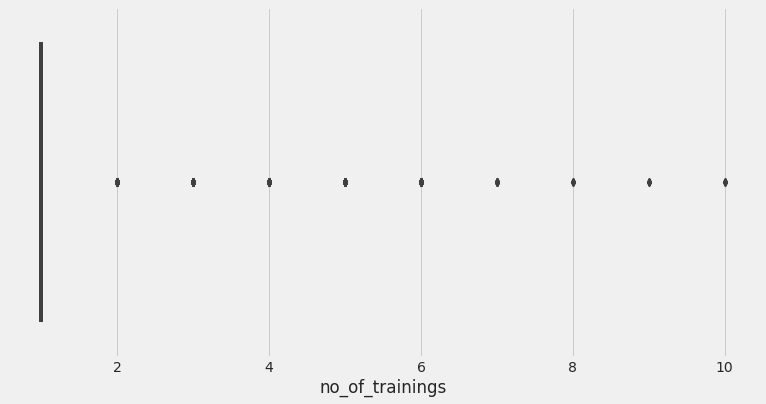

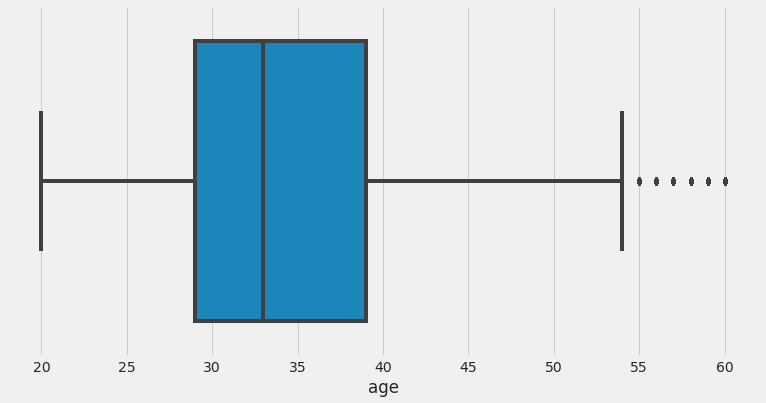

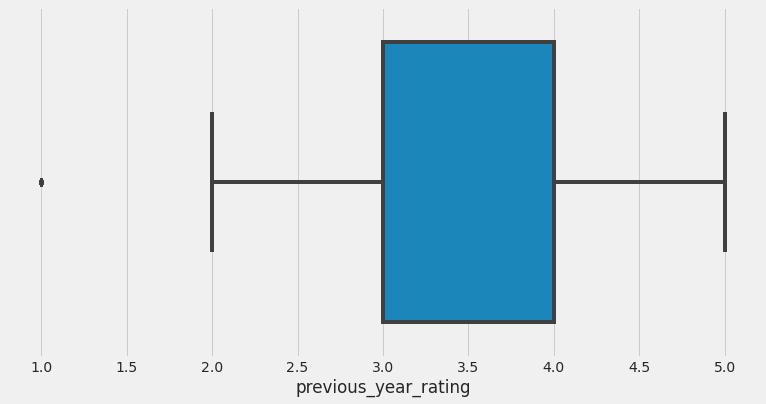

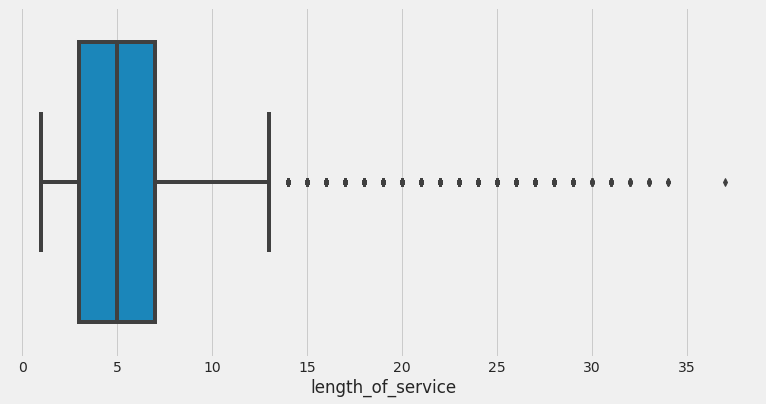

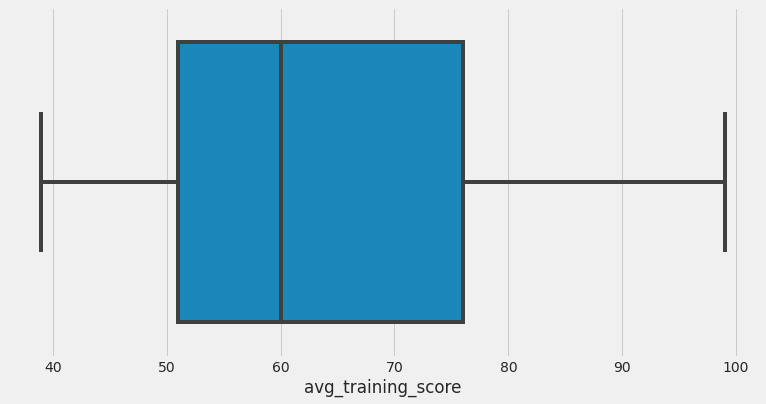

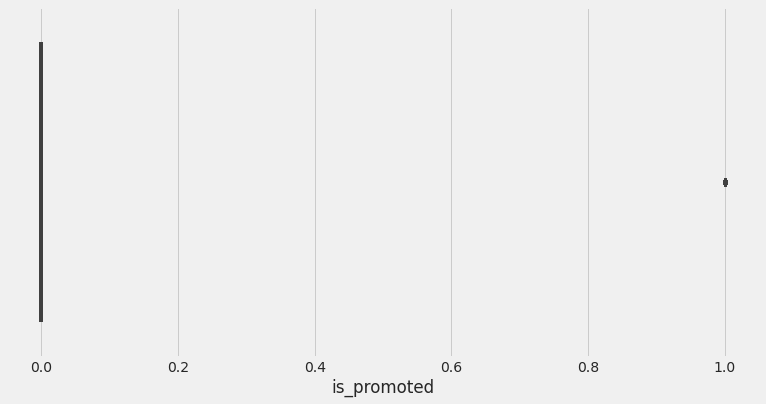

In [19]:
#Numerical features
for i in num_data.columns:
    sns.boxplot(df[i])
    plt.show()


In [20]:
# Predominant employess completed less than 2 trainings, employee upskilling needs to be encouraged
# 50% of employees age is between 28 to 38
#50%  employees are serving in the same company for 3 to 7 years 

# outliers

# no_of_trainings
# age
#length_of_service
#previous_year_rating


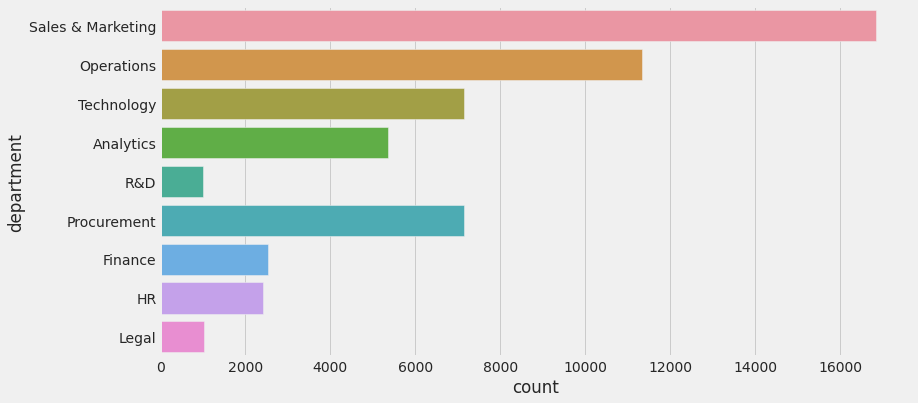

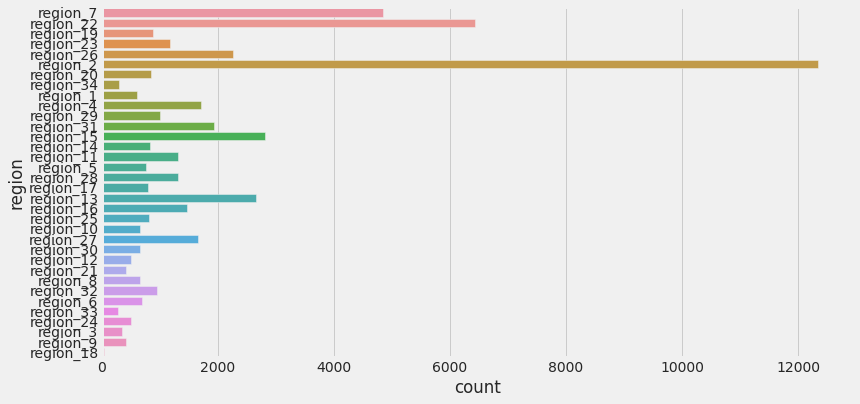

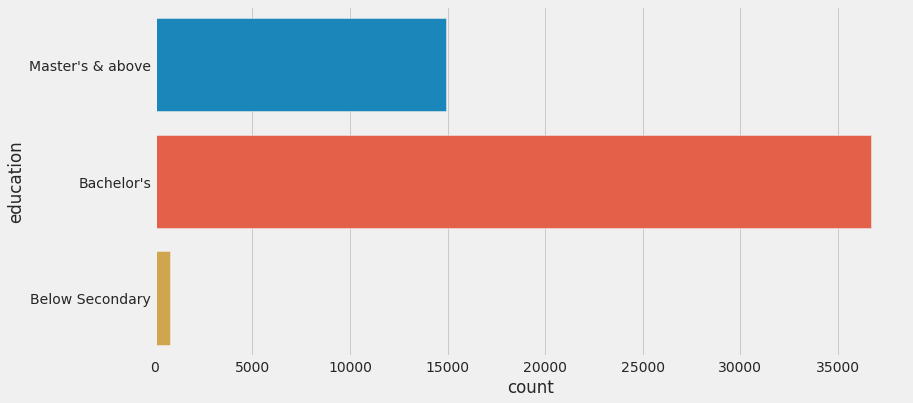

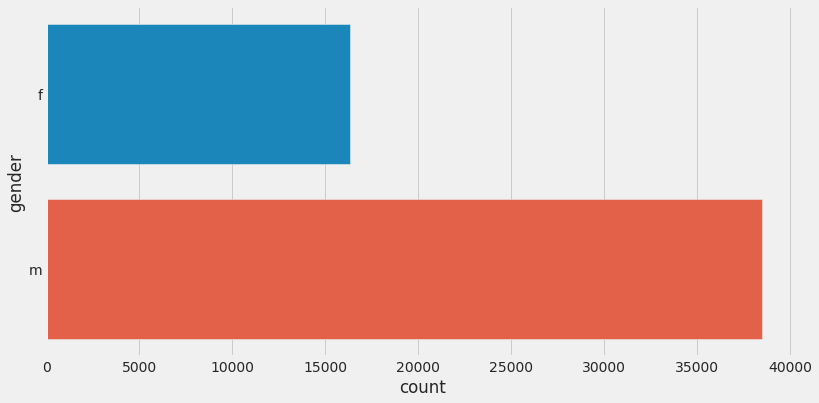

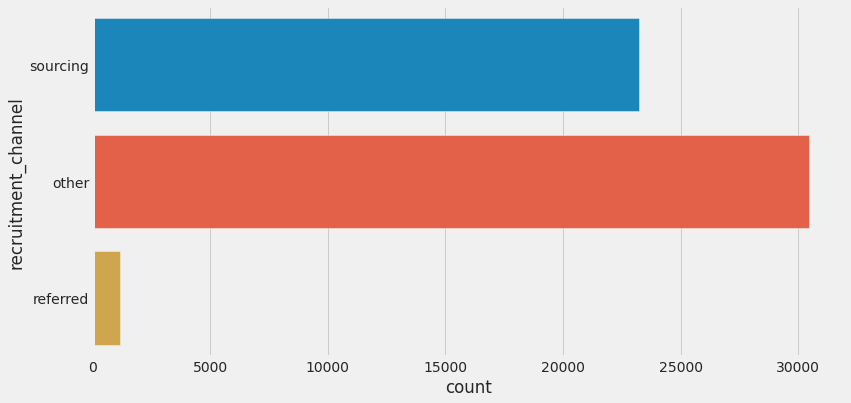

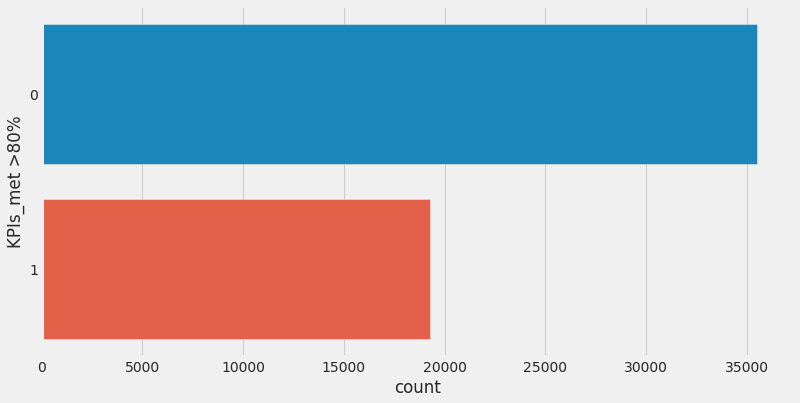

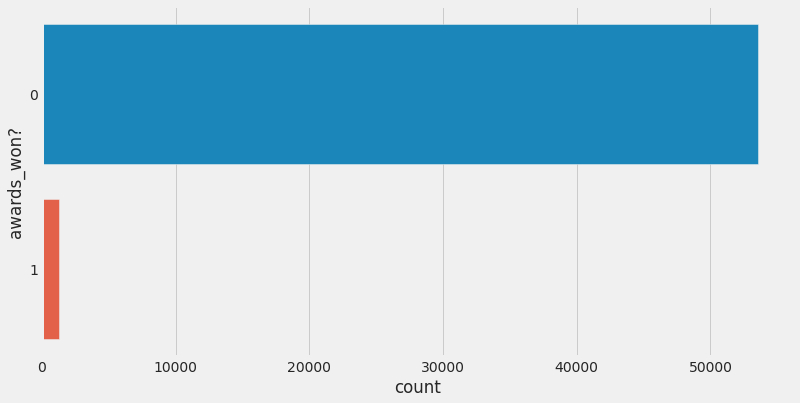

In [21]:
#Categorical features
for i in cat_data.columns:
    sns.countplot(y=cat_data[i])
    plt.show()



The department plot interpret that the majority of employees are present in sales and marketing department

region 2 has maximum number of employees

Most of the employees have completed bachelor's

Most of the employees are male

The KPI metric interpret that less than 50% employees are able to achive 80% of their KPI, this indicates employees performance are not upto the mark.

The maximum employees are recruited through others followed by sourcing and very few by referral,

This may be because of referral bonus and goodies are not up to the level that encourage the employees to refer

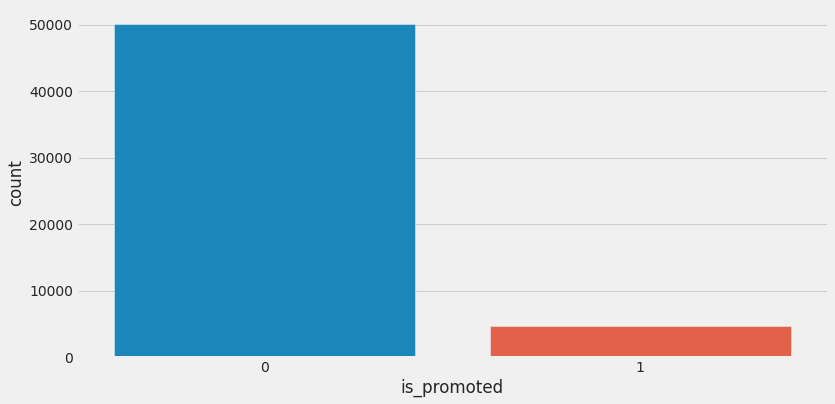

In [22]:
sns.countplot(df['is_promoted'])

In [23]:
df['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

The target feature 'is_promoted' is highly imbalanced, we need to perform oversampling to overcome the target imbalance

In [24]:
# Bivariate analysis

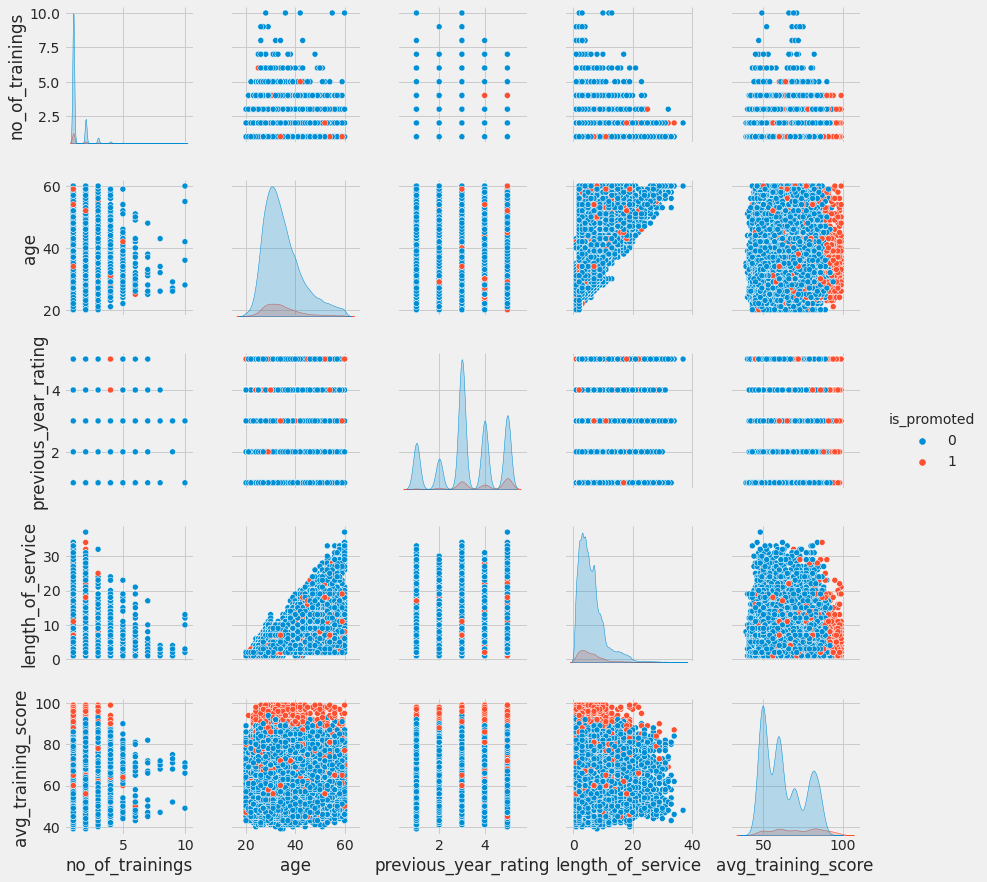

In [25]:
sns.pairplot(num_data,hue='is_promoted')

[link text](https://)Visually there is no significant difference observed between the promotion eligible and not eligible employees in all numeric features. 

The distrubition looks overlapping, however we can verify it with statistical testing

The predominan employees scored above 90 in avg_training_score  are promoted

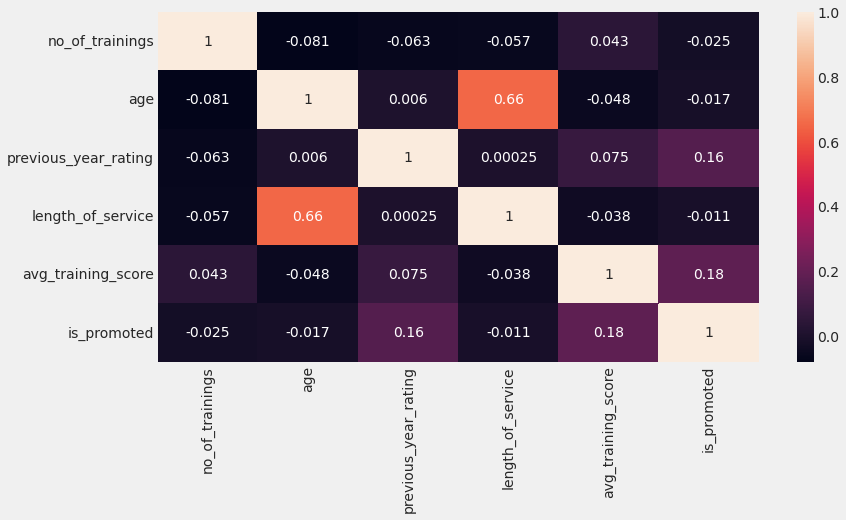

In [26]:
sns.heatmap(df.corr(),annot=True)

slight multicollinearity has been observed between age and length_of_service

average_training_score and previous_year_rating express comparetively high correlation against the target feature



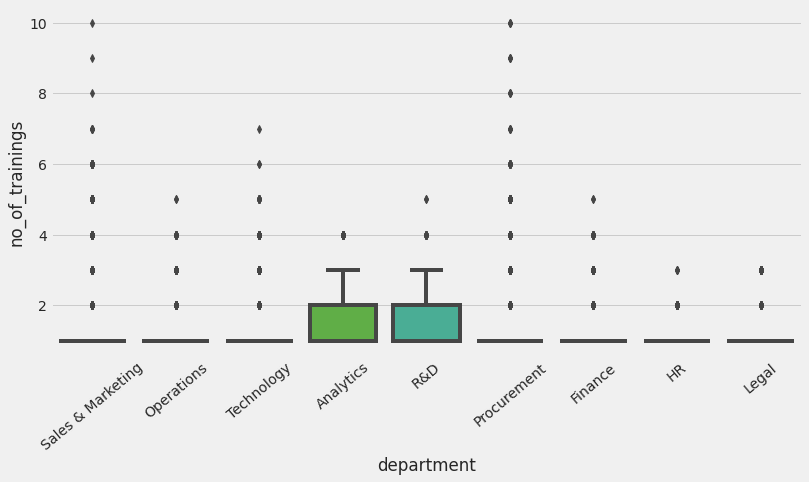

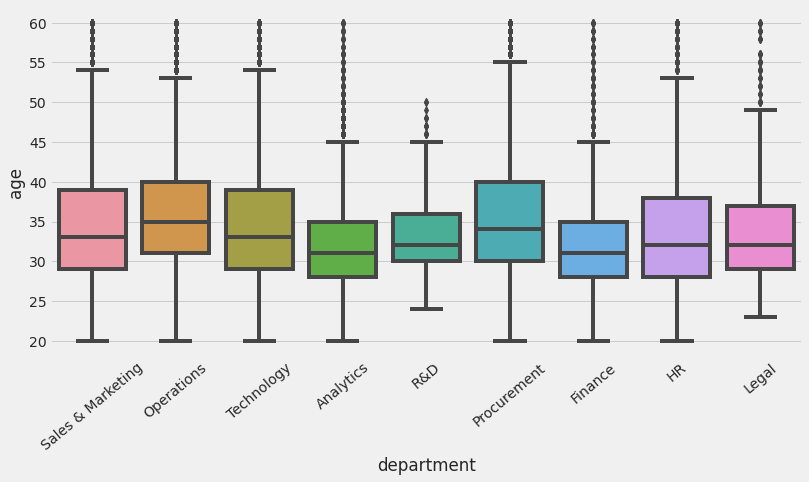

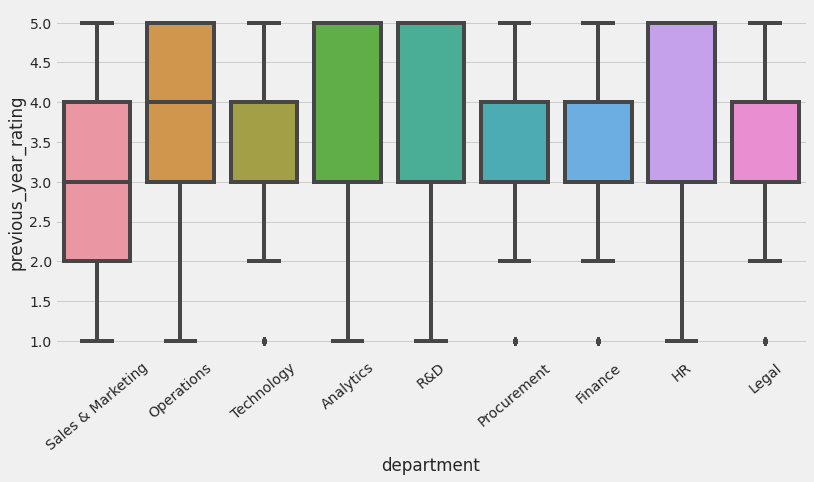

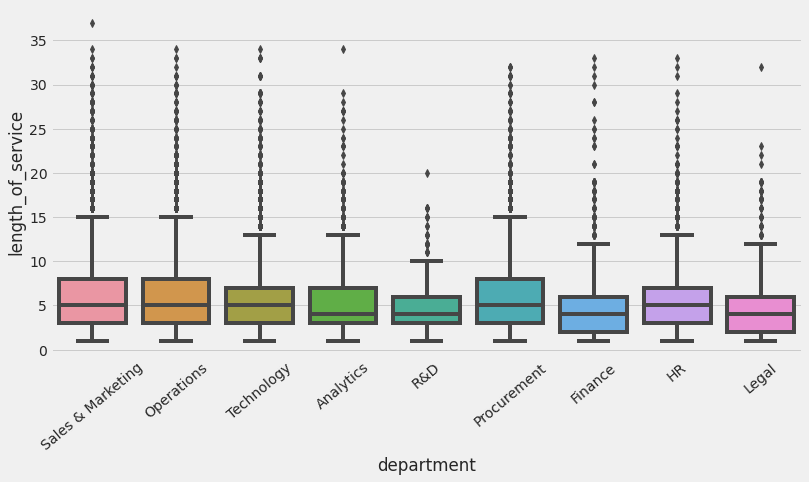

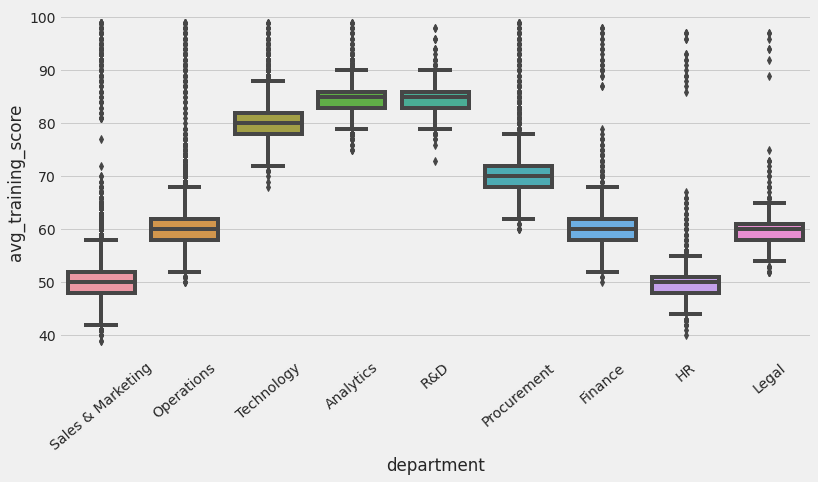

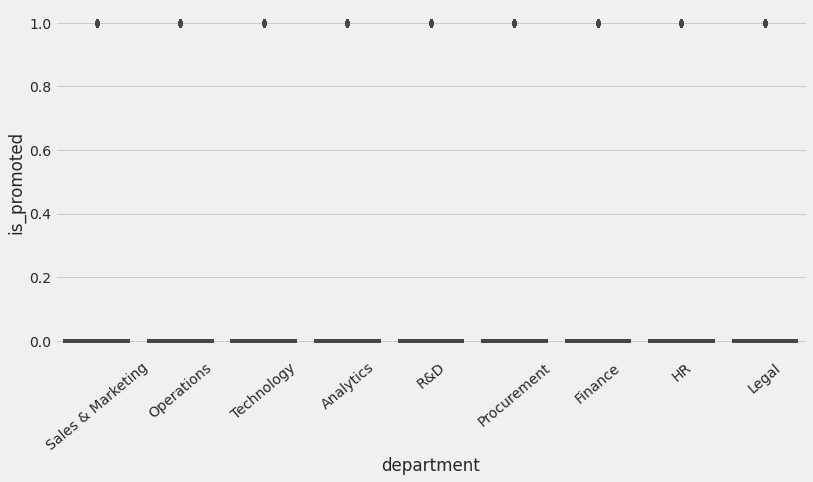

In [27]:
for i in num_data.columns:
    sns.boxplot(df['department'],df[i])
    plt.xticks(rotation=40)
    plt.show()

Majority of employees in analytics and R&D are attending more training

The 50% of employees in sales and marketing receives rating less than 3.0

The employees in Techonology, Analtics and R&D have better average_training_score than other departments 

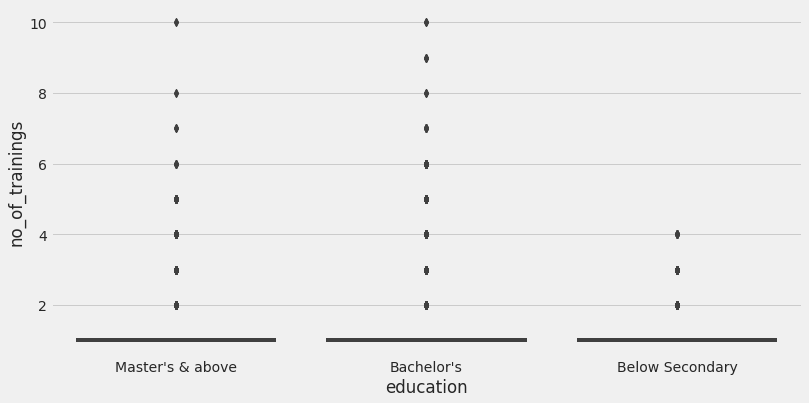

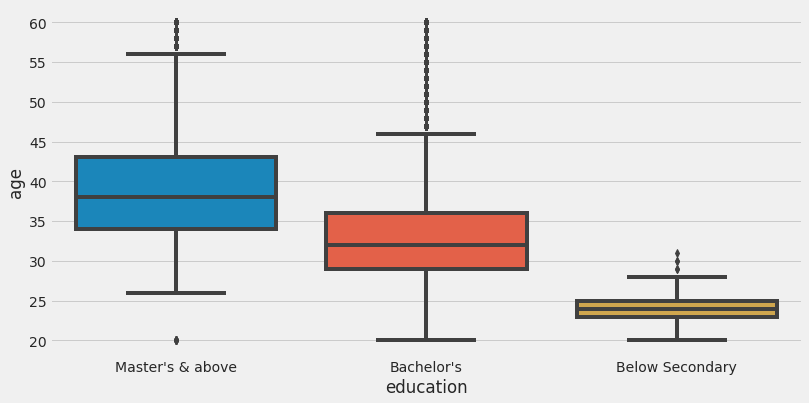

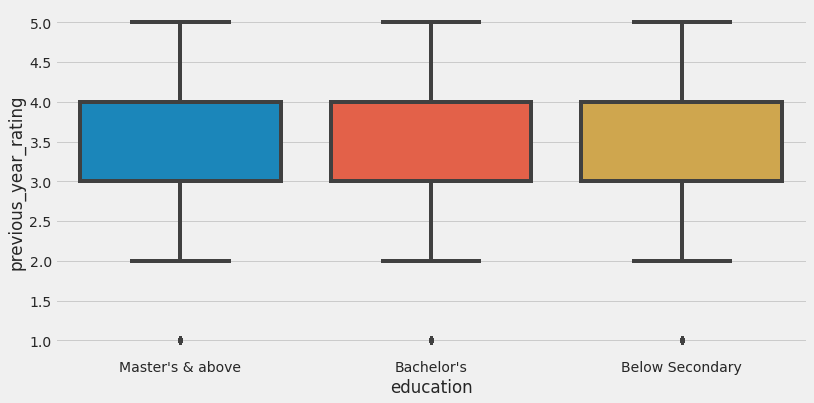

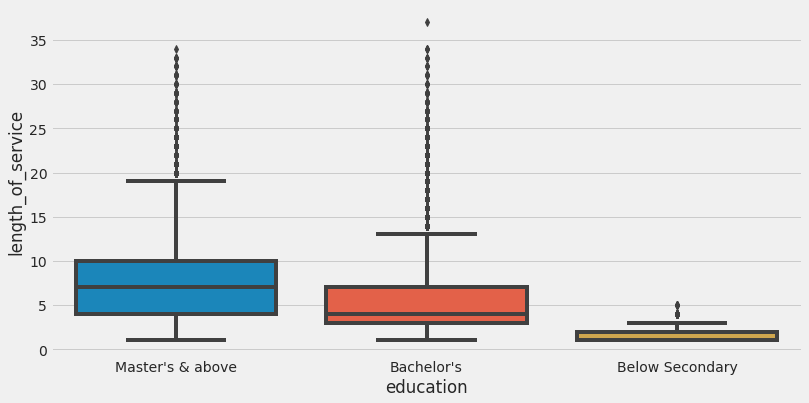

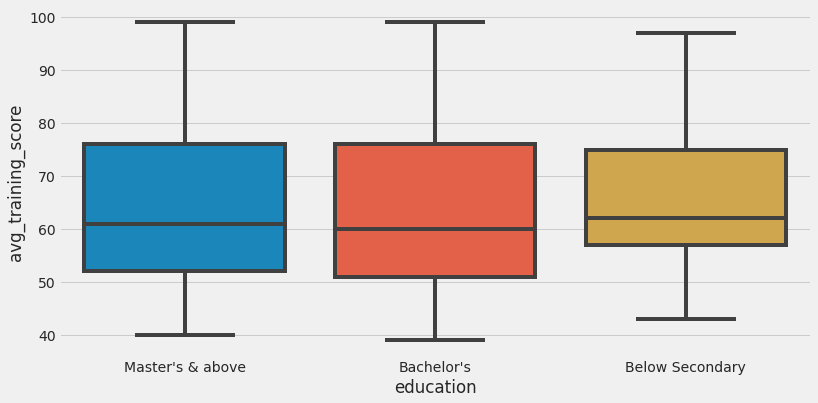

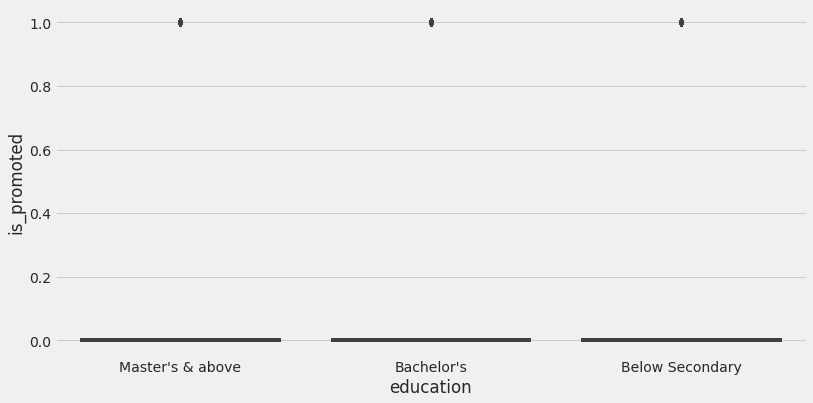

In [28]:
for i in num_data.columns:
    sns.boxplot(df['education'],df[i])
    plt.show()

**The** employee education and length of servise have association

The emploees with masters and above are the long run employees than the employees with othere educational qualifications

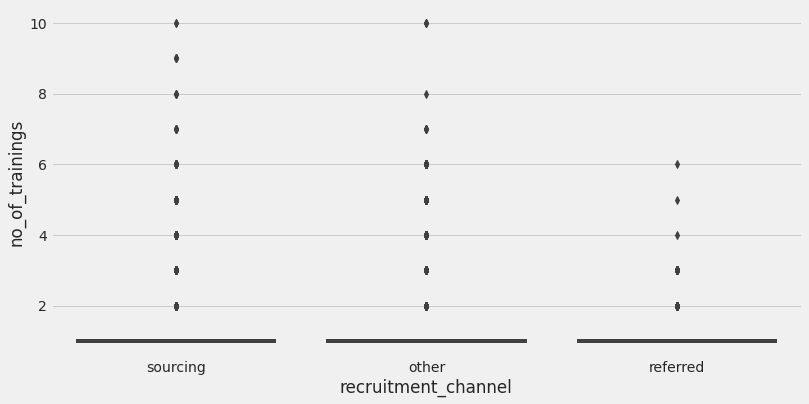

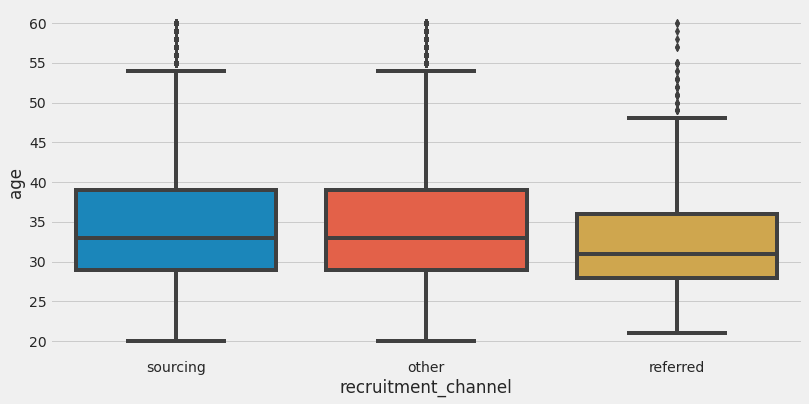

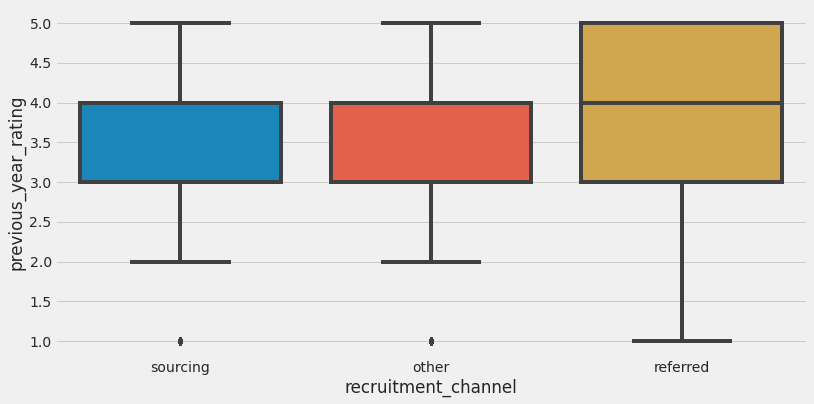

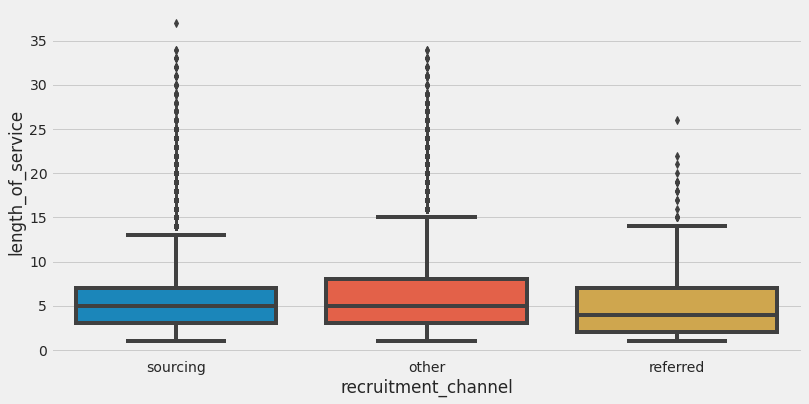

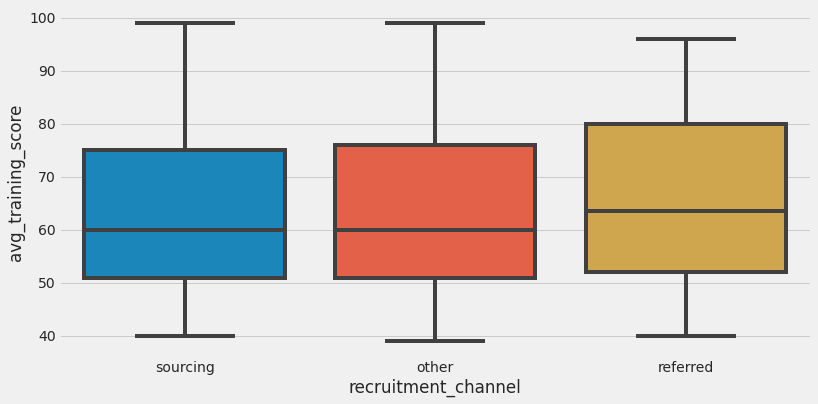

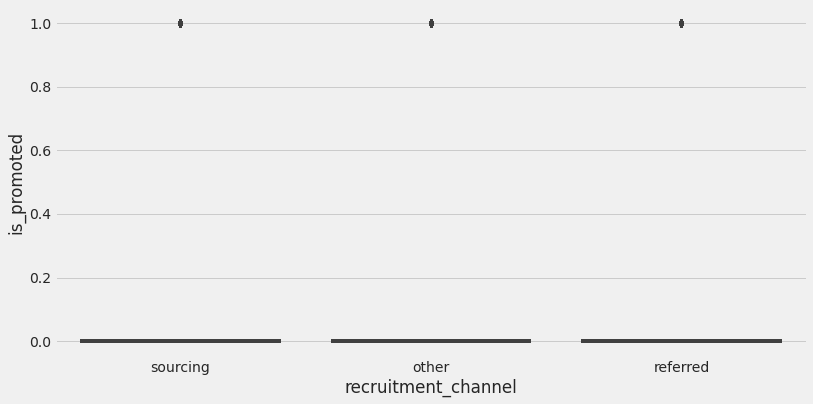

In [29]:
for i in num_data.columns:
    sns.boxplot(df['recruitment_channel'],df[i])
    plt.show()

The employees in refeeral obtained better rating than other rating channel

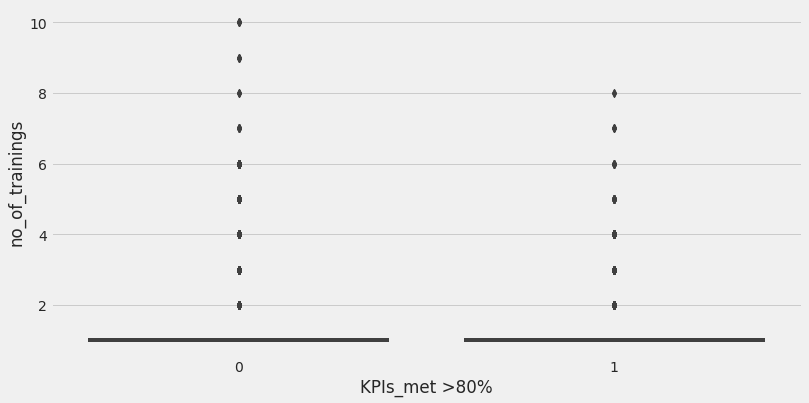

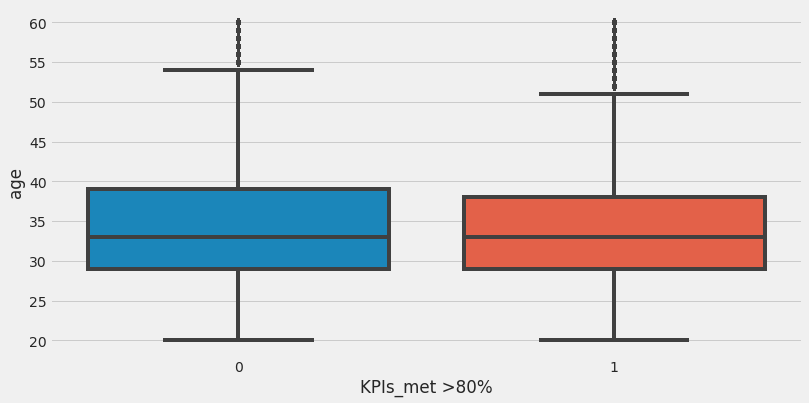

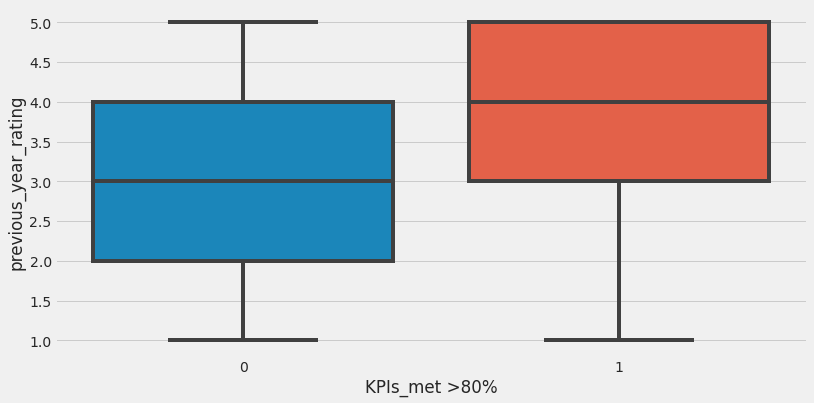

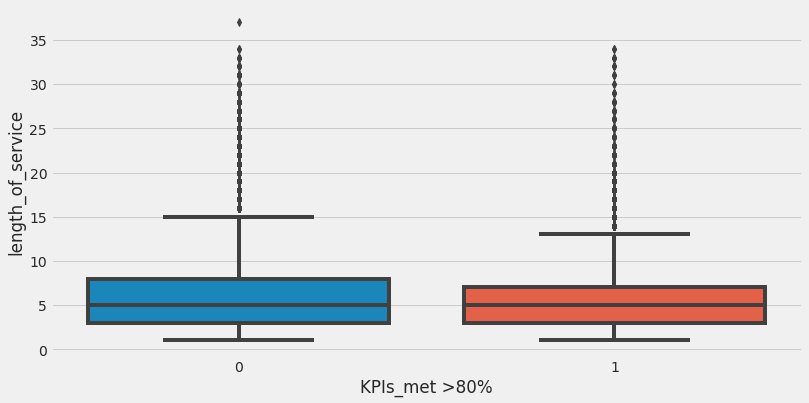

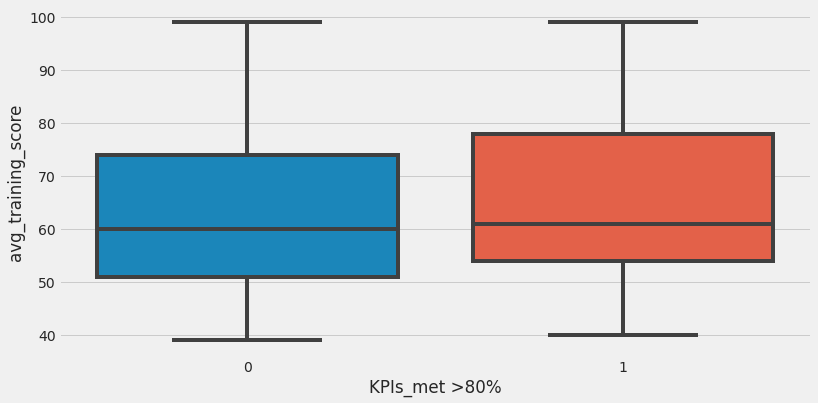

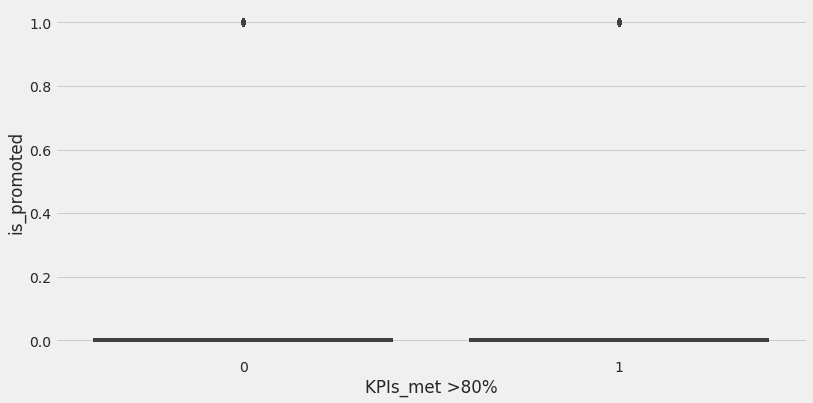

In [30]:
for i in num_data.columns:
    sns.boxplot(df['KPIs_met >80%'],df[i])
    plt.show()

In [31]:
pd.crosstab(df['KPIs_met >80%'],df['is_promoted'])/df['is_promoted'].value_counts()    

is_promoted,0,1
KPIs_met >80%,,
0,0.680315,0.3012
1,0.319685,0.6988


69% promoted employees are achived the KPI>80% milestone.

This indicates the strong association between target and KPIs_met >80% feature.



```
# This is formatted as code
```

The employees who achived the >80% KPI milestone received the maximum rating(3.0 to 5.0)

The employees achived >80% KPI milestone have slightly better average training score

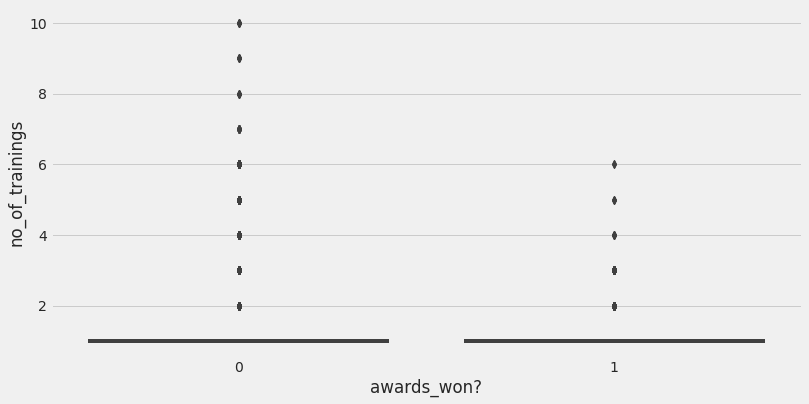

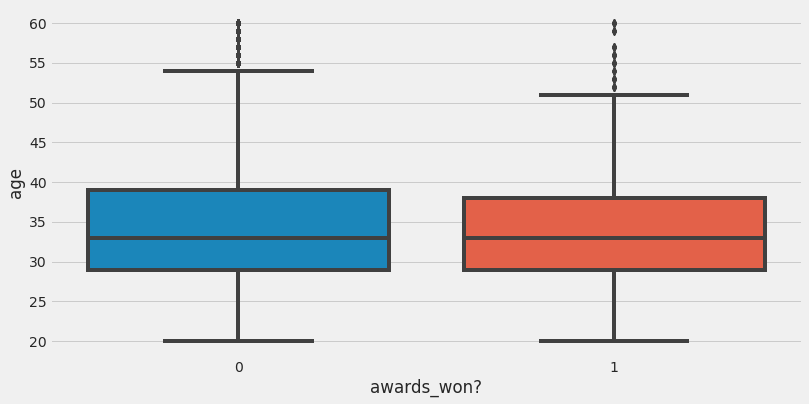

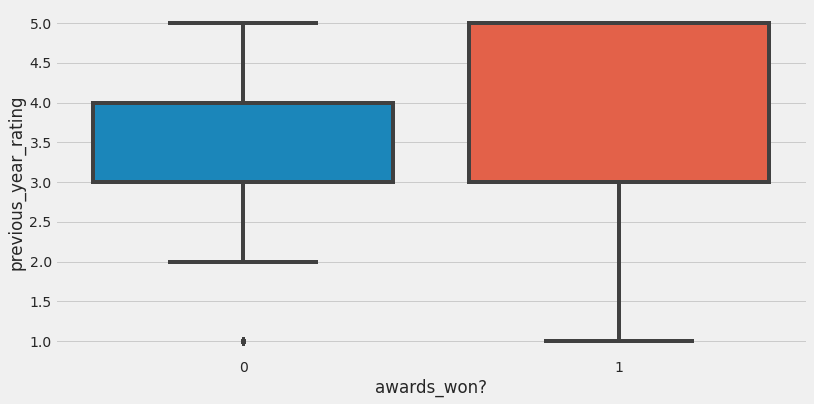

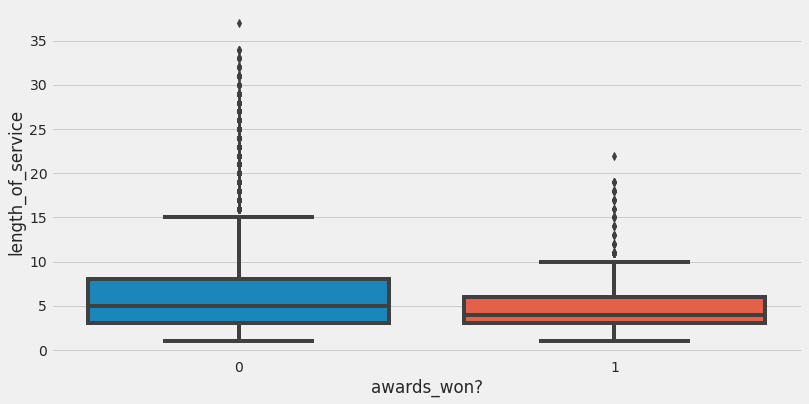

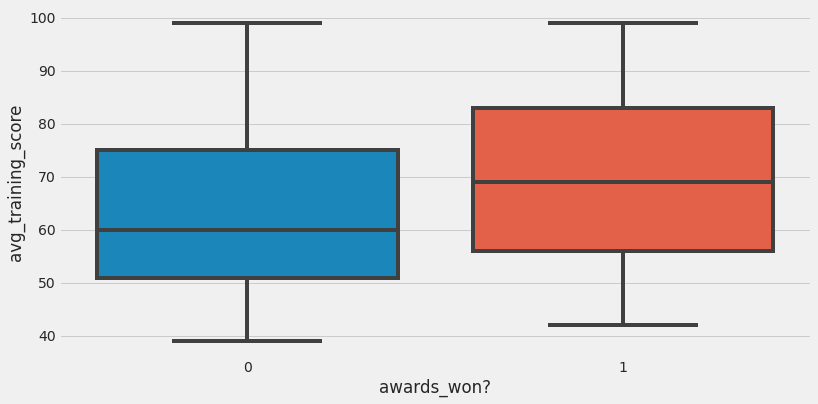

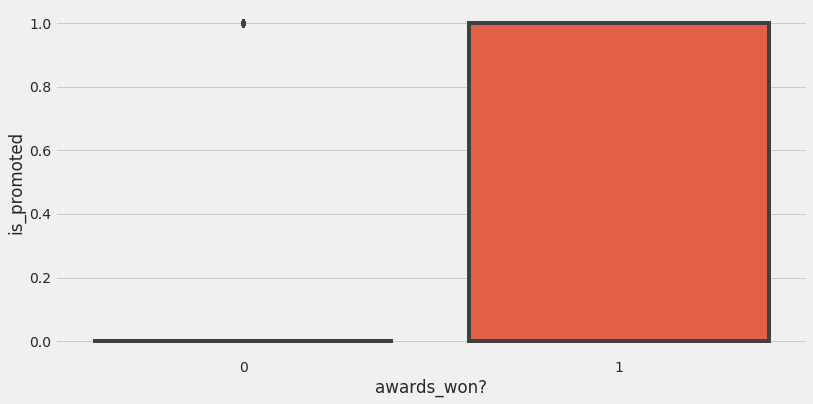

In [32]:
for i in num_data.columns:
    sns.boxplot(df['awards_won?'],df[i])
    plt.show()

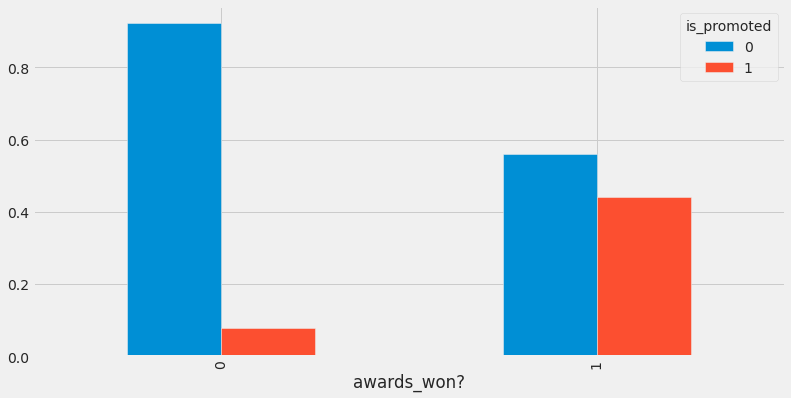

In [33]:
pd.crosstab(df['awards_won?'],df['is_promoted'],normalize='index').plot(kind='bar')

44% promoted employees are award winners.


The predominant awards won employees secured raing above 3.0

The award won employees have comparitively less service period (sevice<10 years)

Predominant award won employees have comparitively good average training score (score>55)

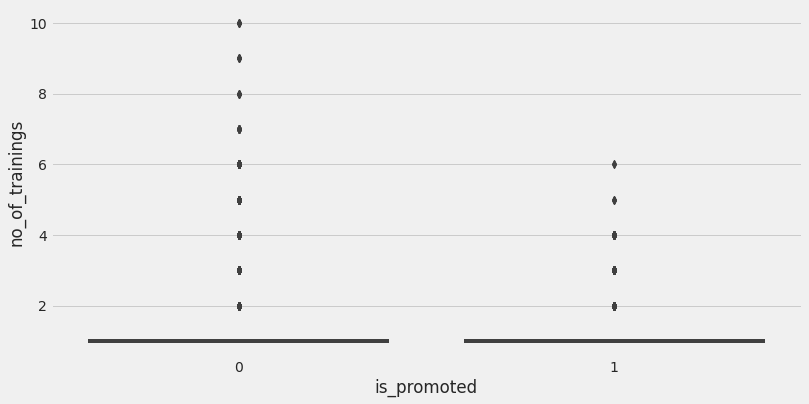

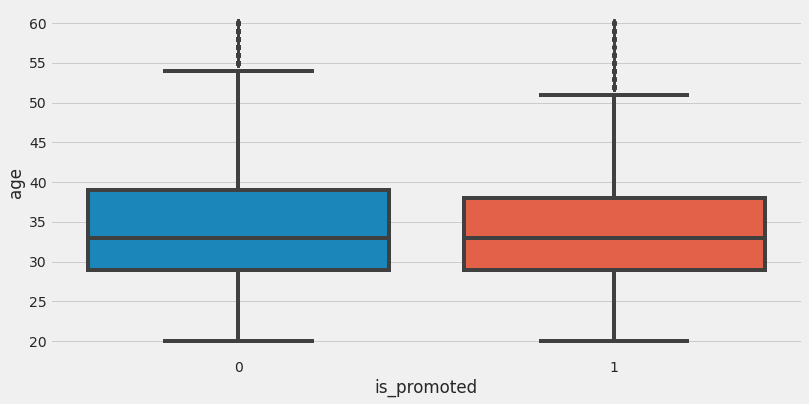

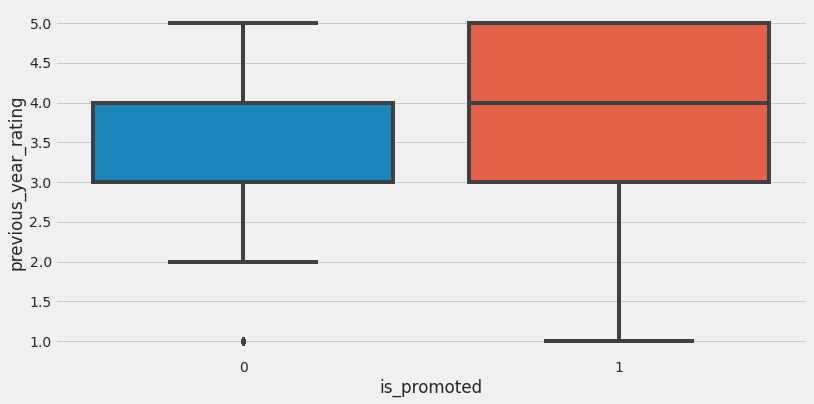

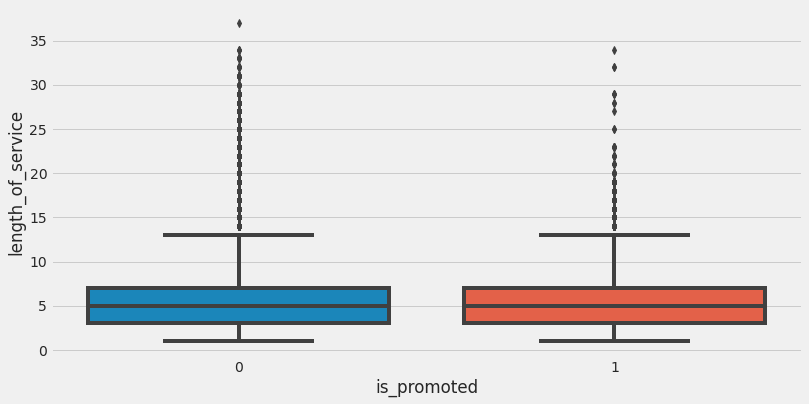

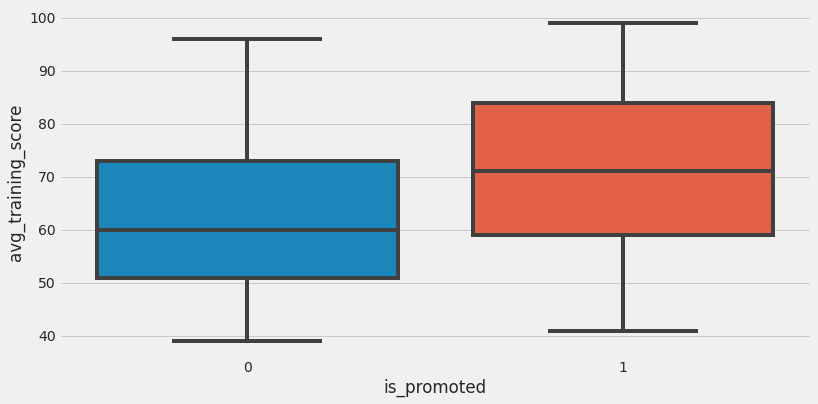

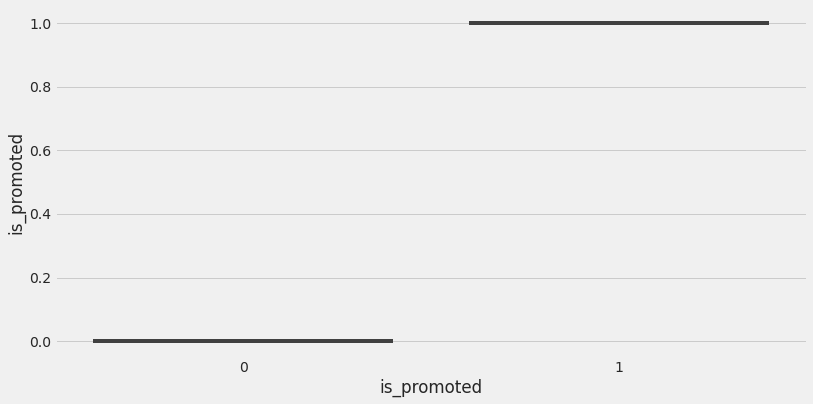

In [34]:
for i in num_data.columns:
    sns.boxplot(df['is_promoted'],df[i])
    plt.show()

The employees avg_training_score and rating are the significant features in predicting the target

In [35]:
# MULTIVARIATE ANALYSIS


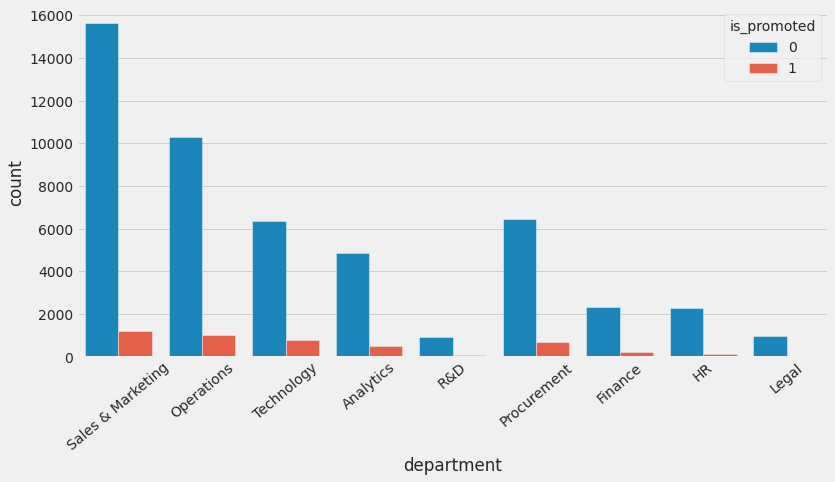

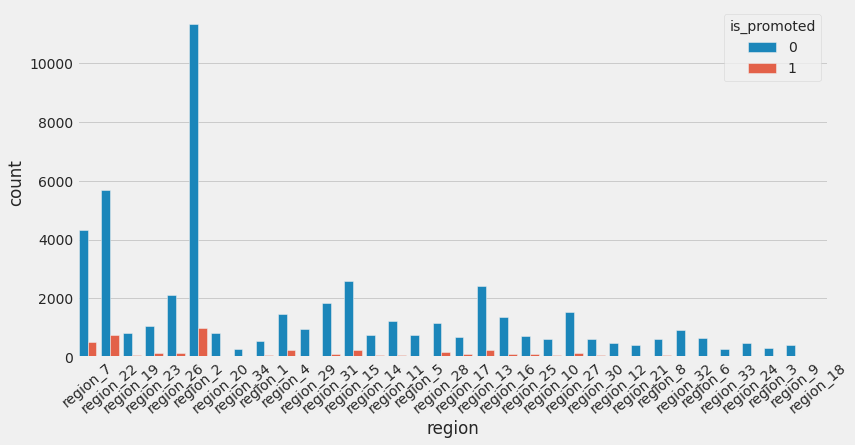

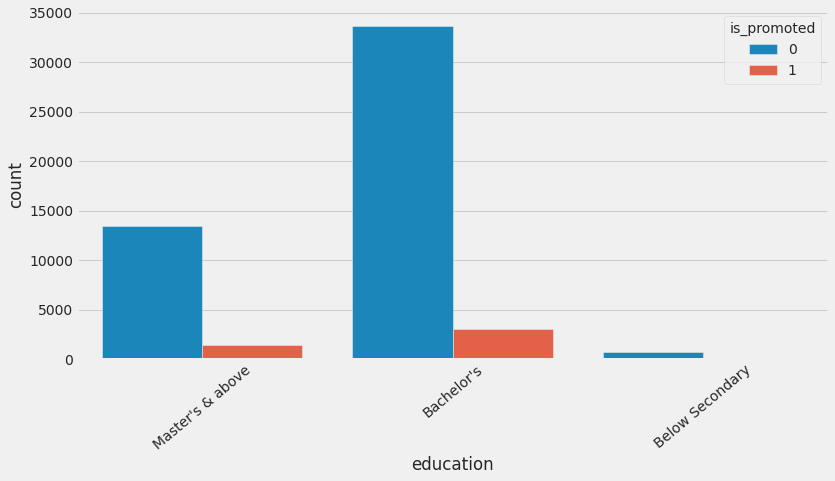

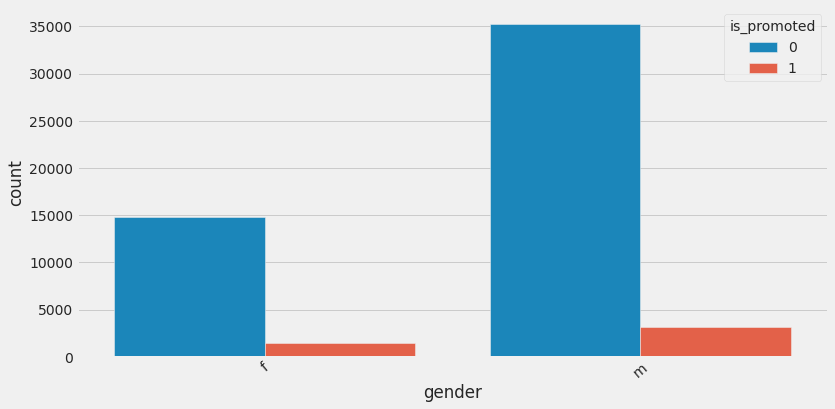

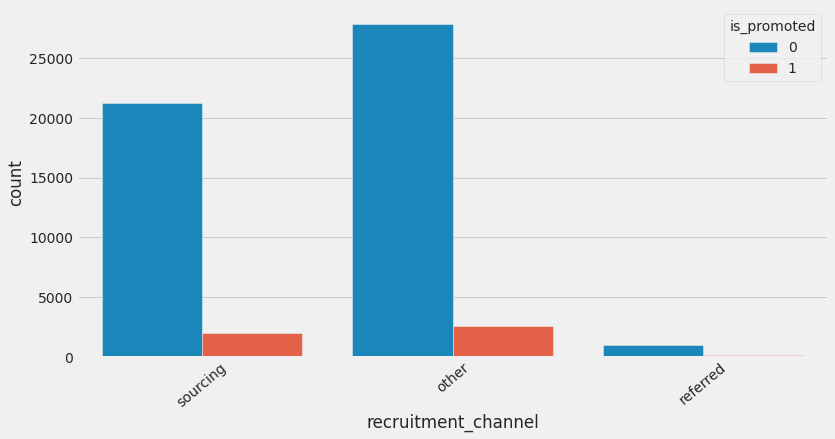

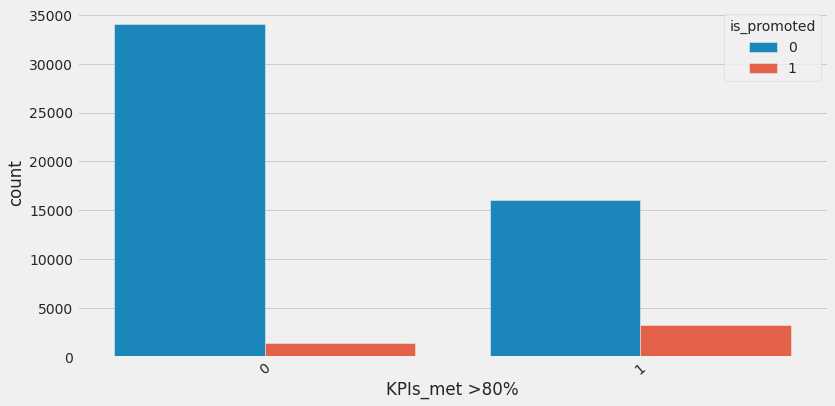

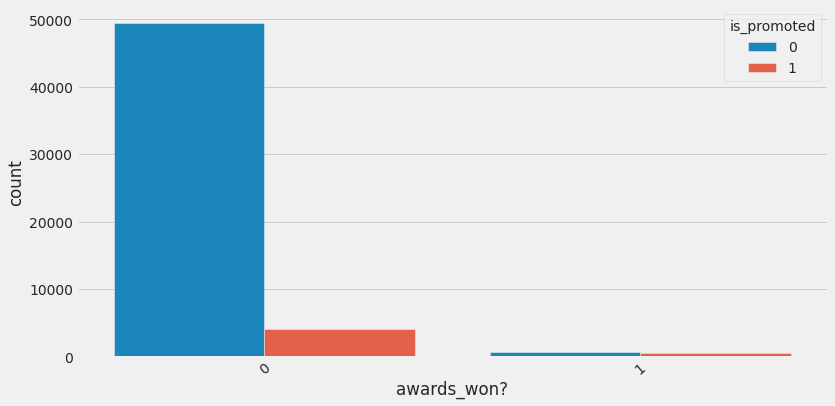

In [36]:
for i in cat_data.columns:
    sns.countplot(df[i],hue=df['is_promoted'])
    plt.xticks(rotation=40)
    plt.show()

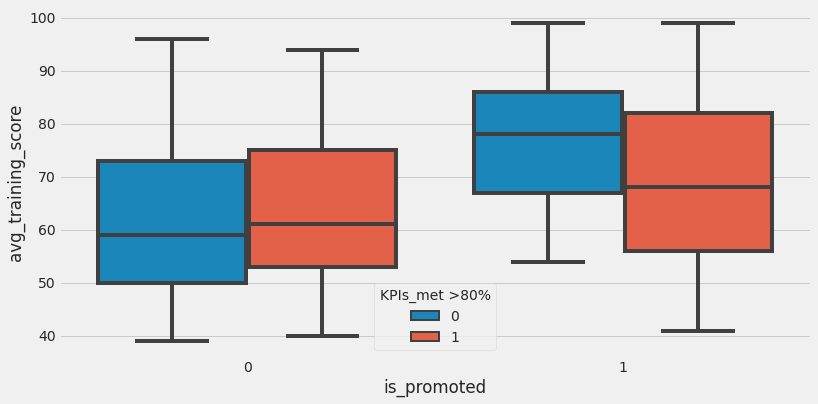

In [37]:
sns.boxplot(df['is_promoted'],df['avg_training_score'],hue=df['KPIs_met >80%'])

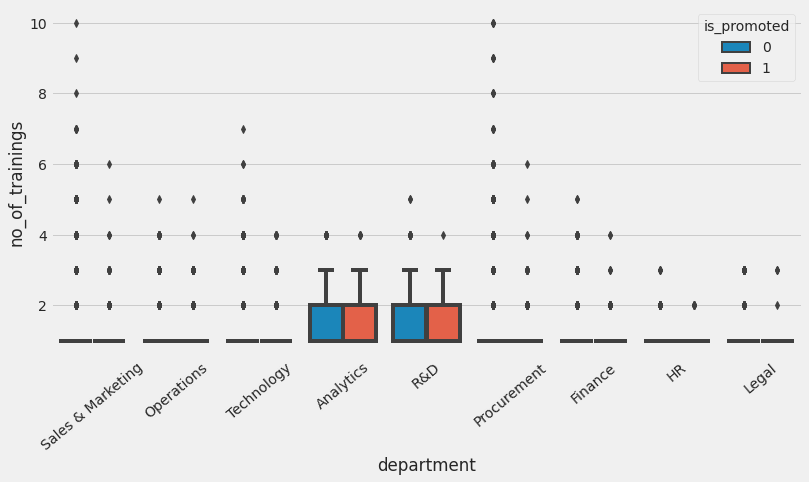

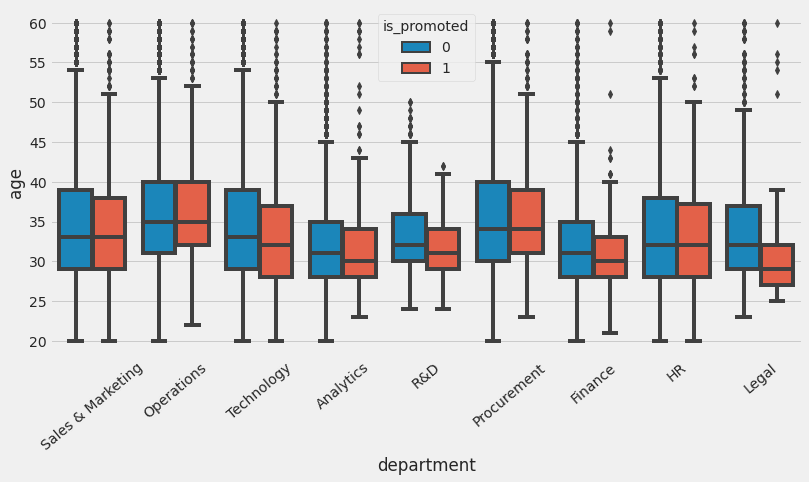

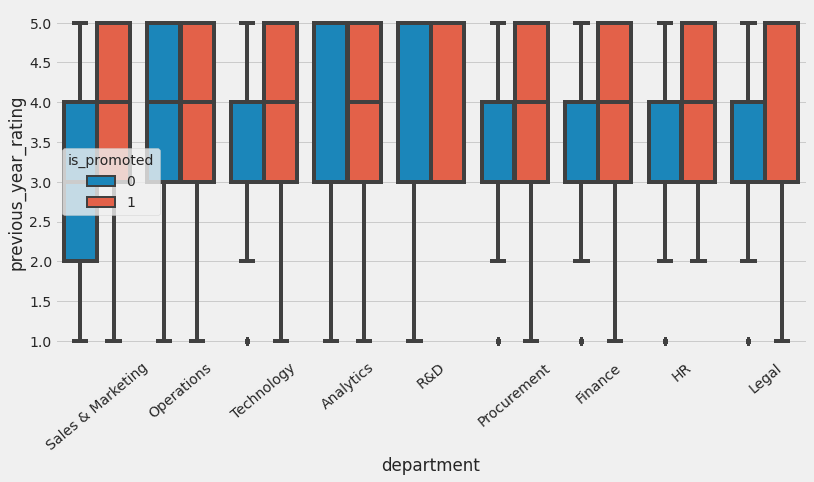

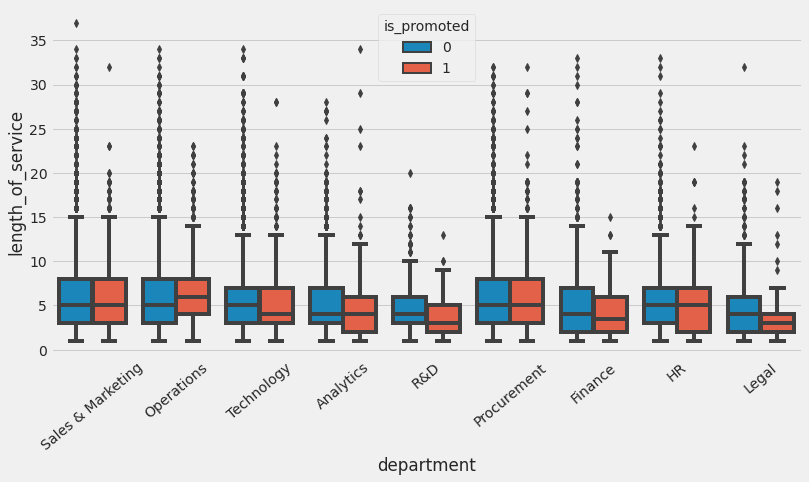

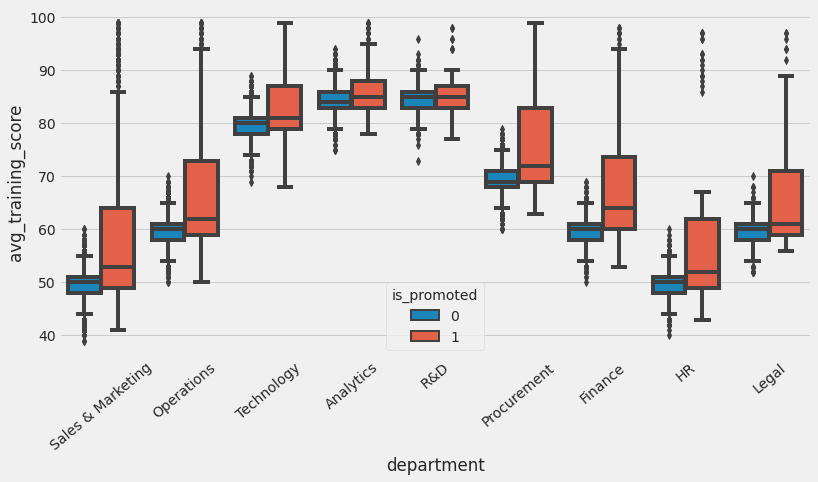

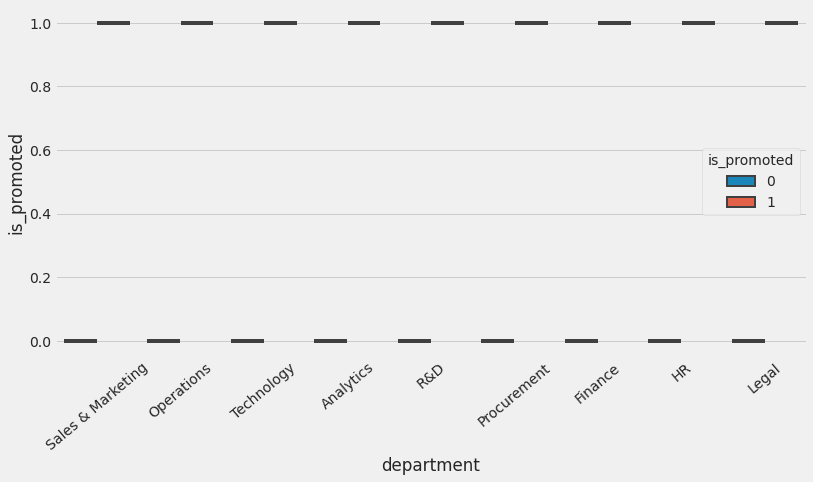

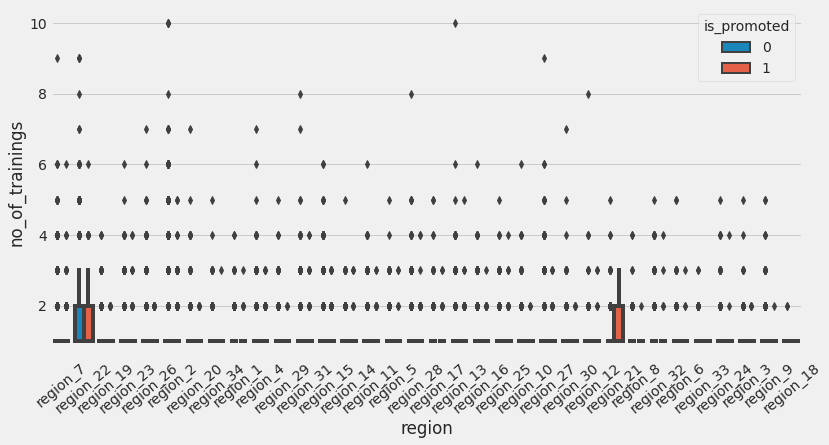

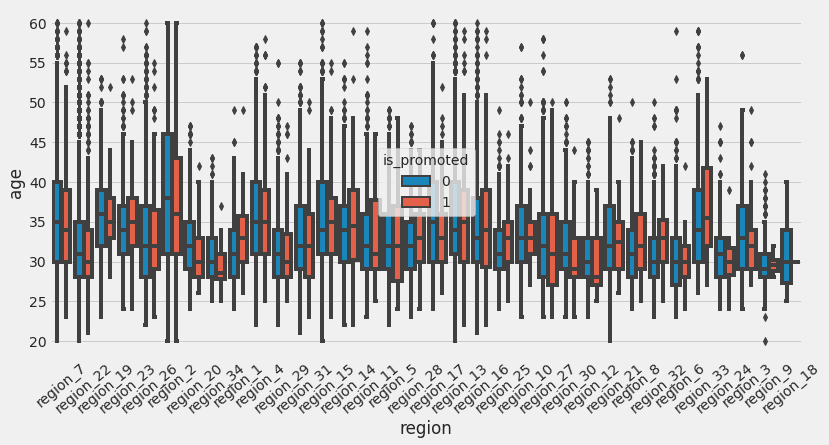

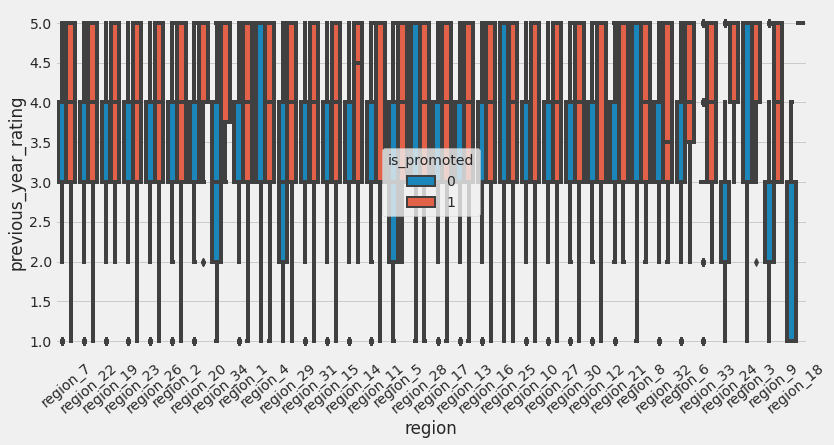

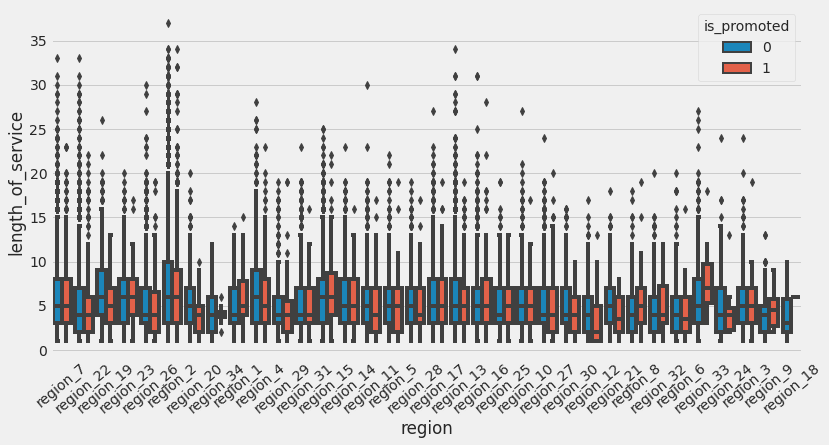

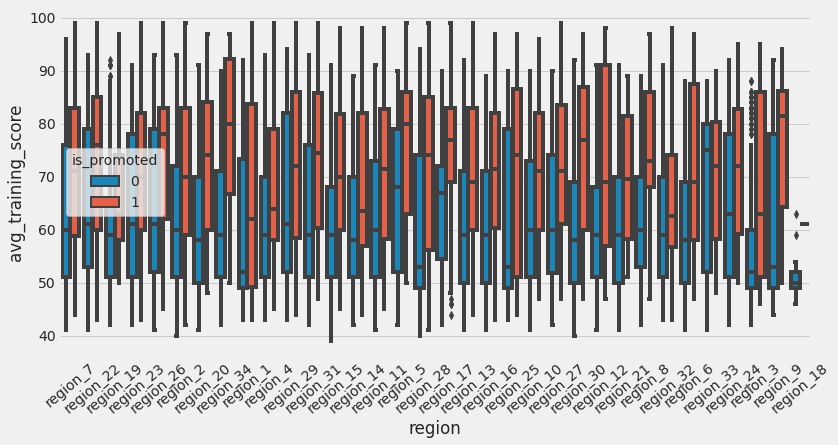

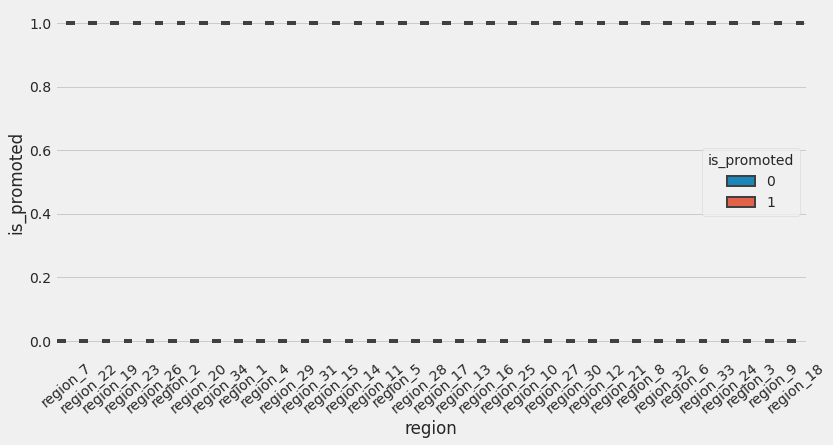

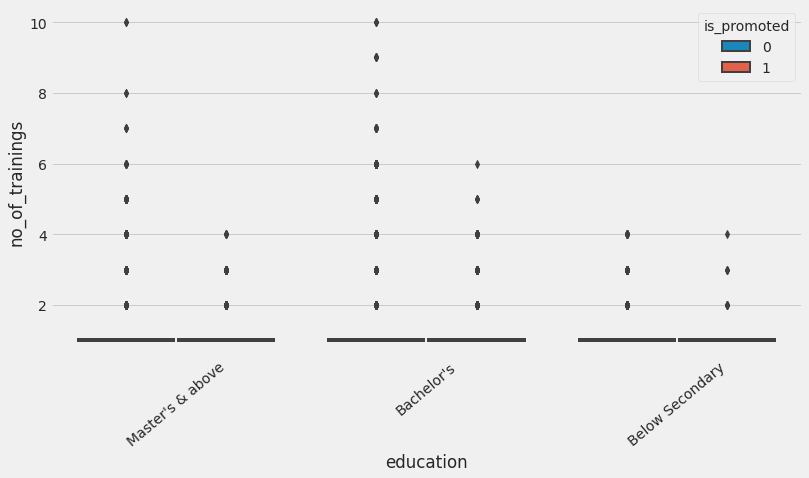

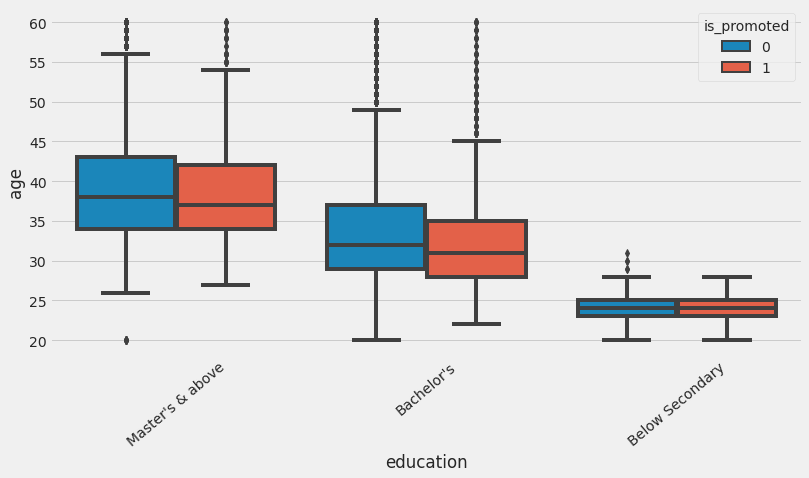

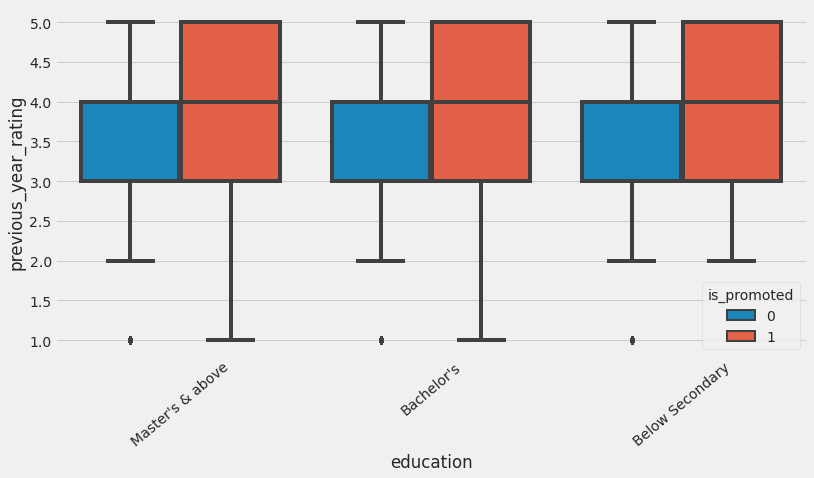

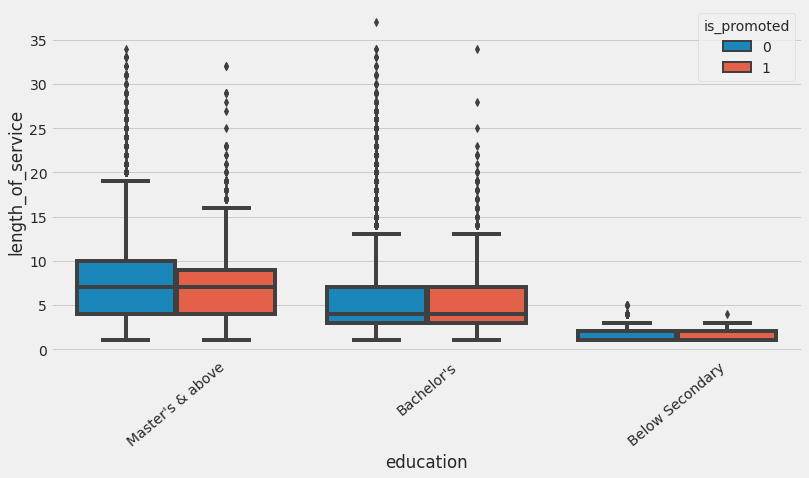

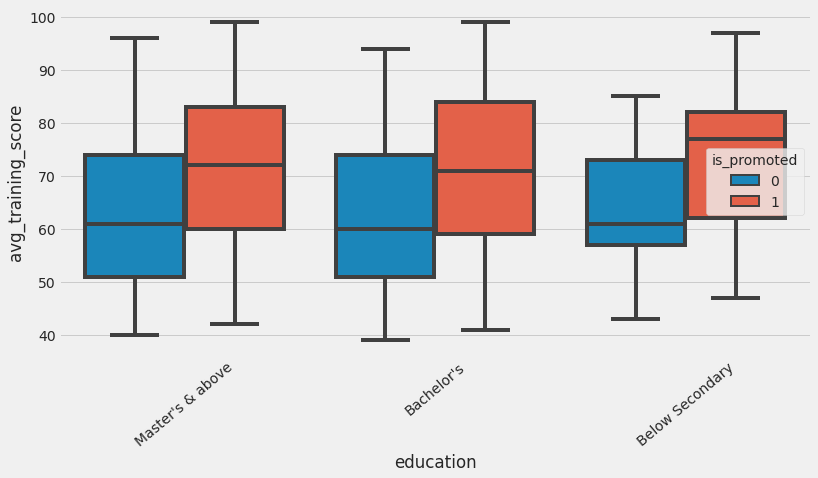

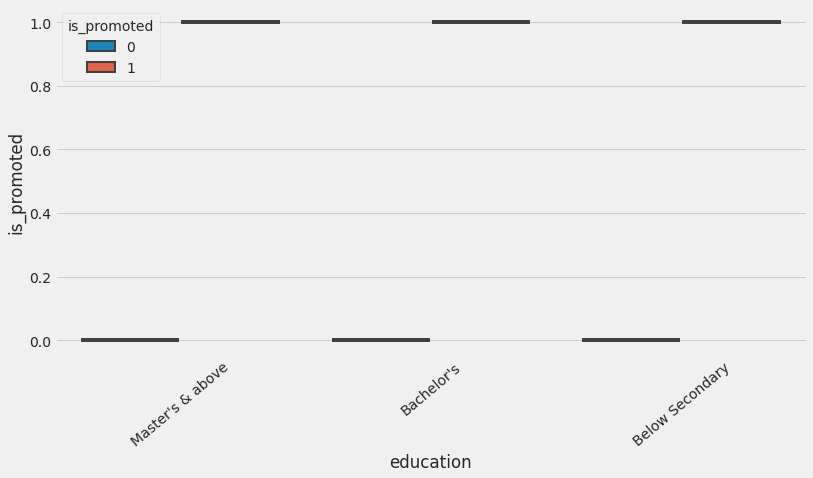

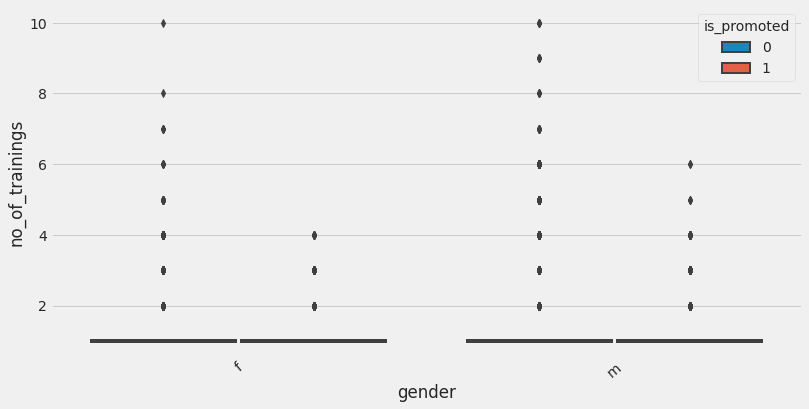

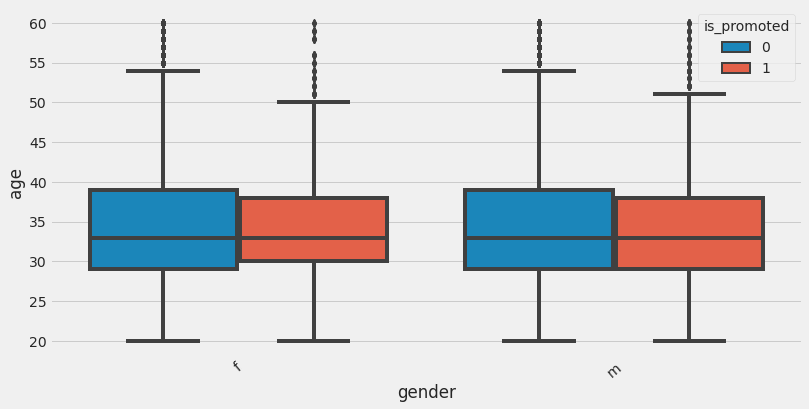

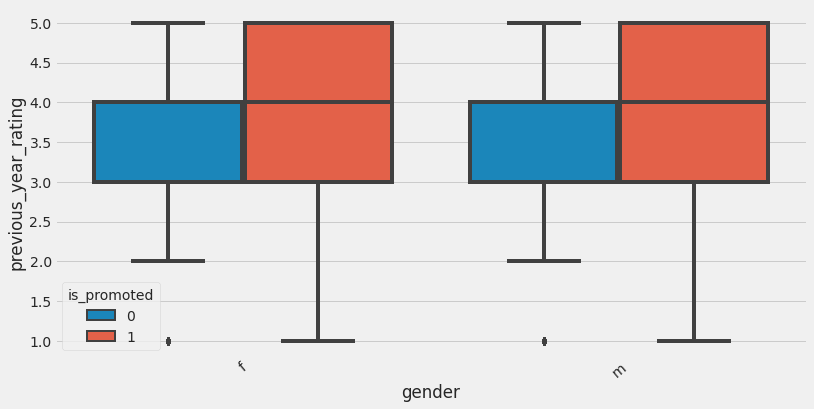

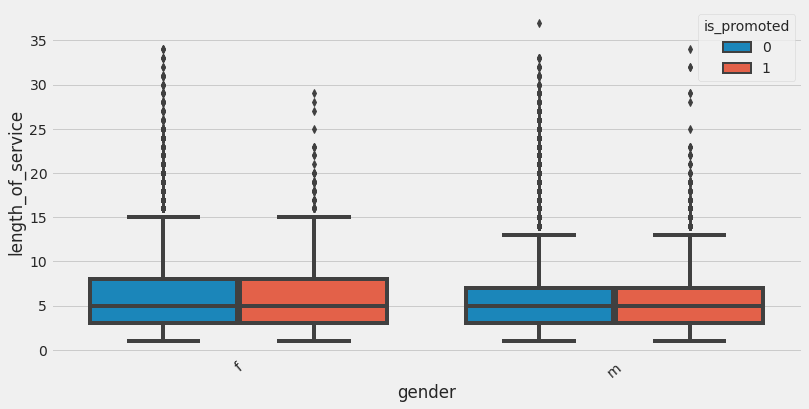

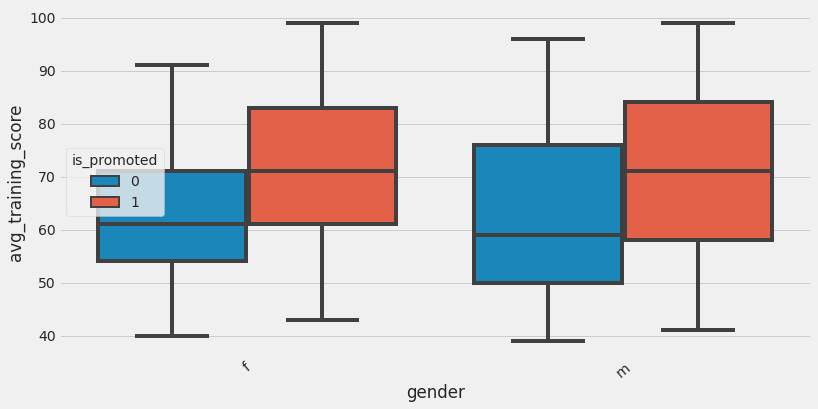

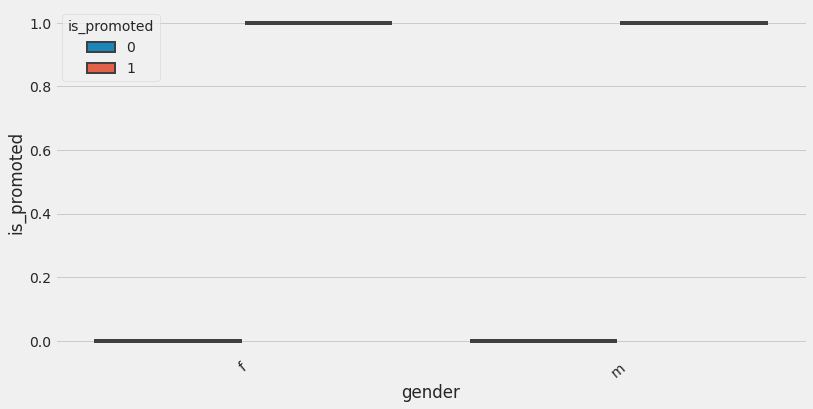

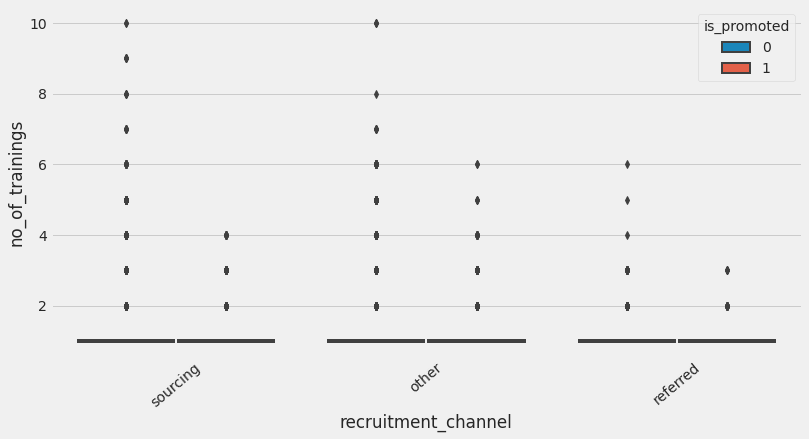

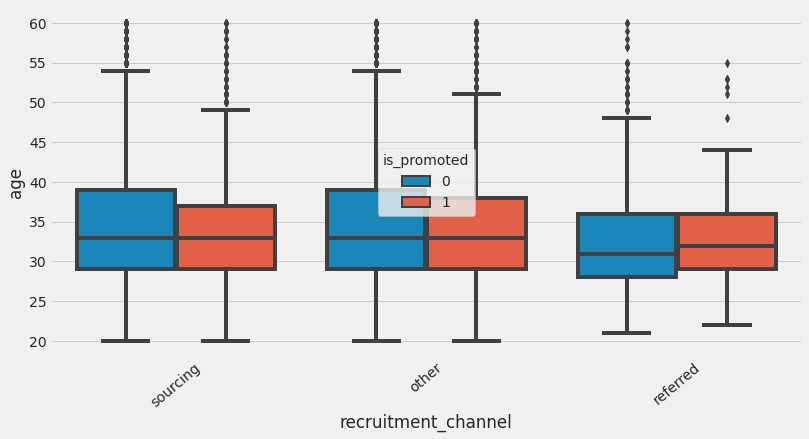

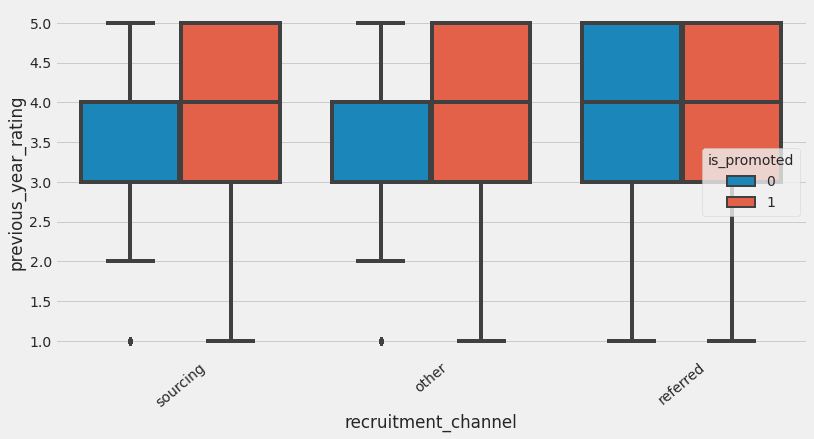

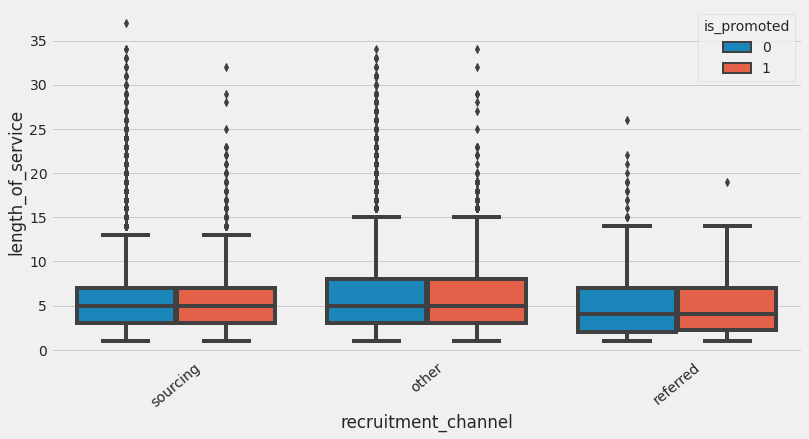

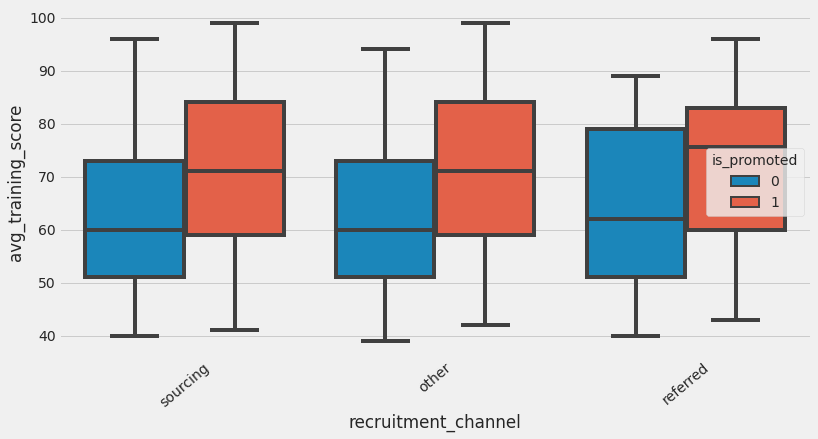

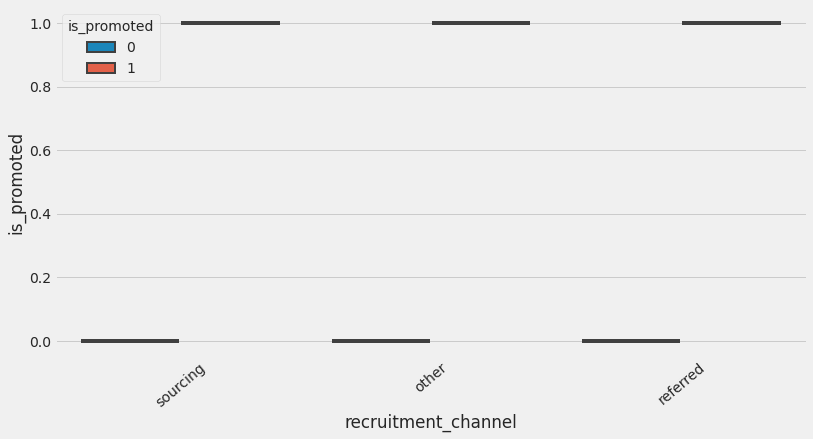

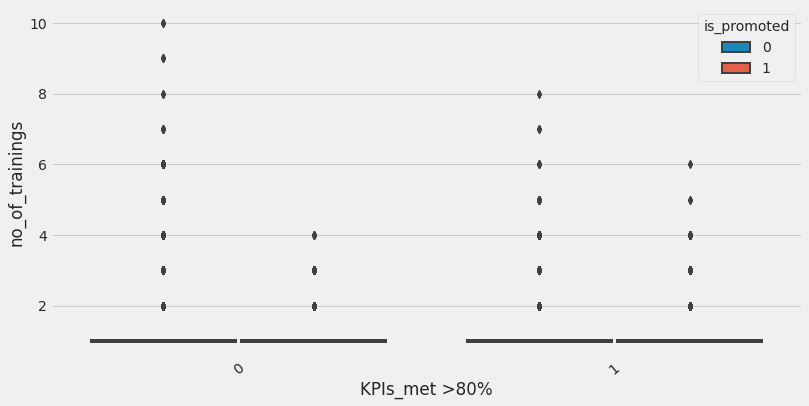

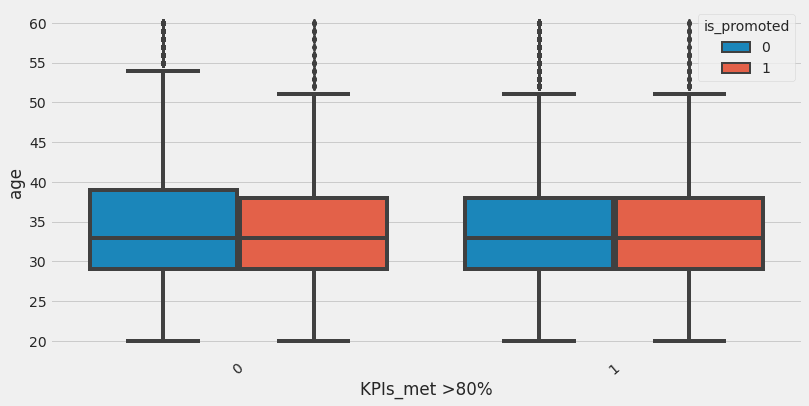

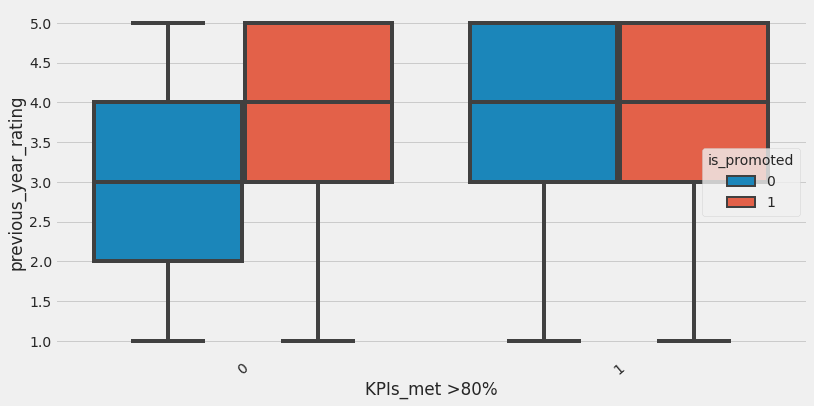

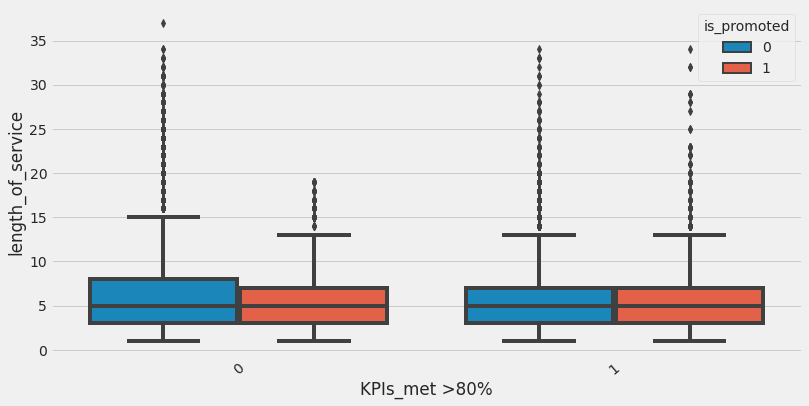

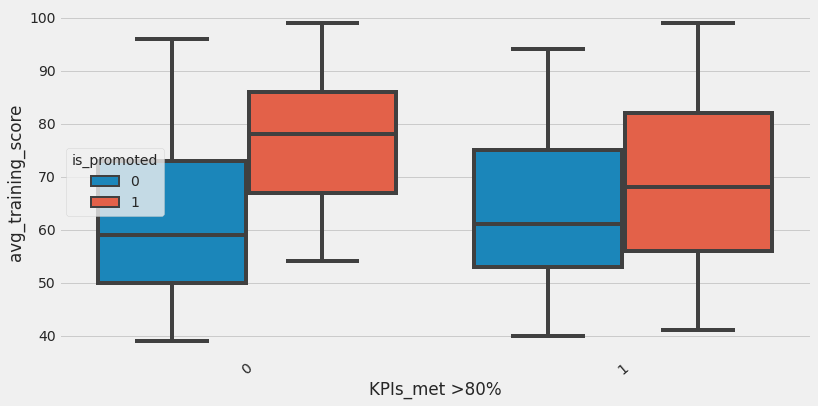

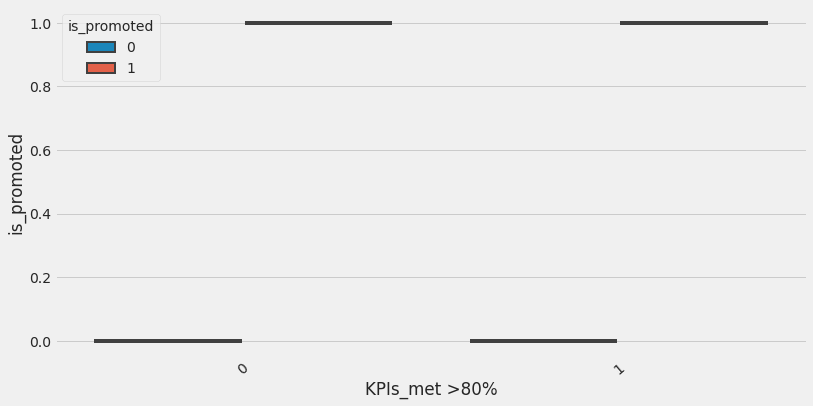

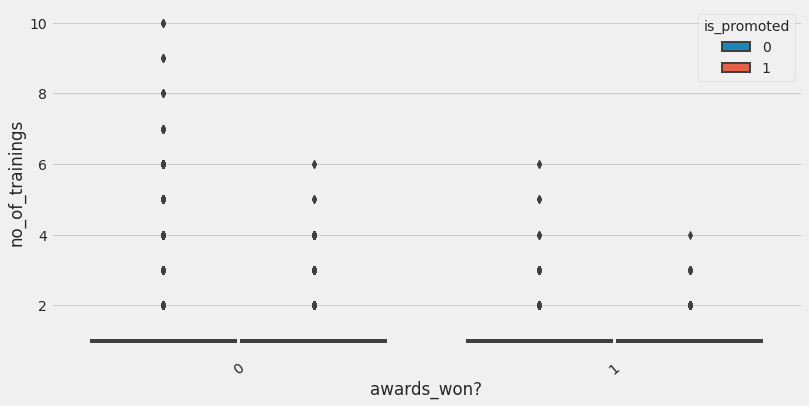

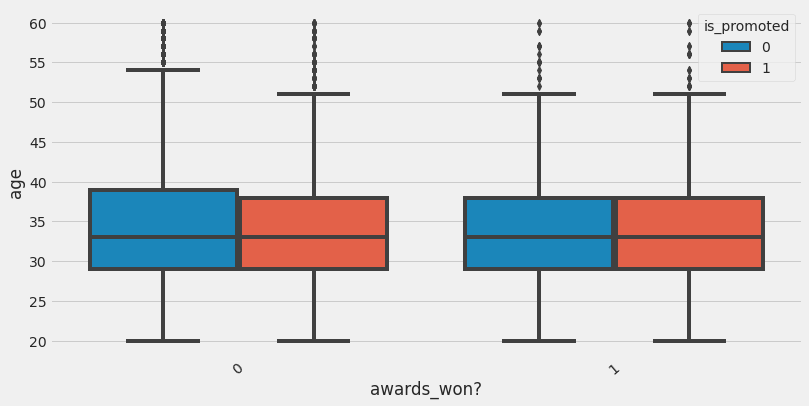

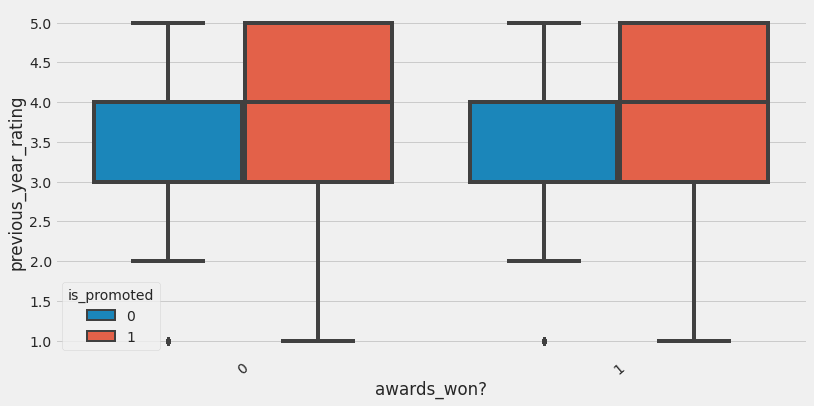

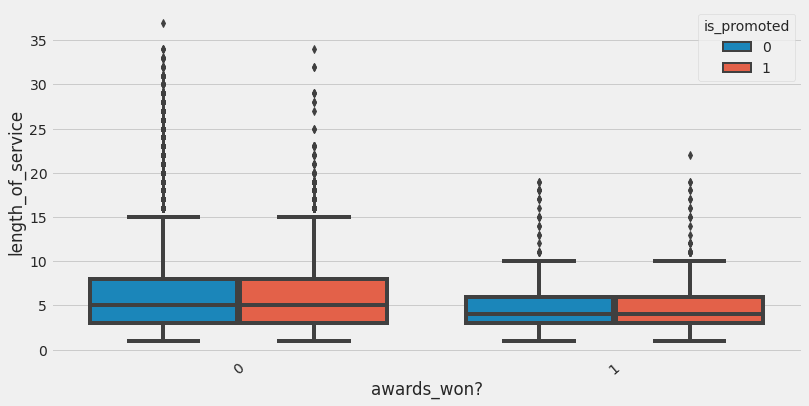

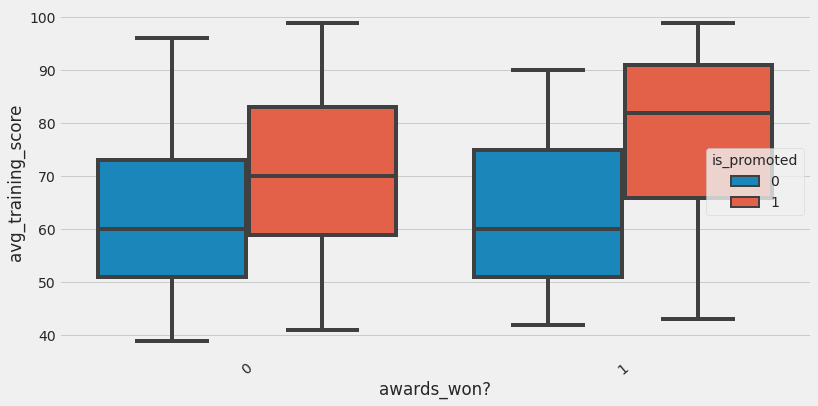

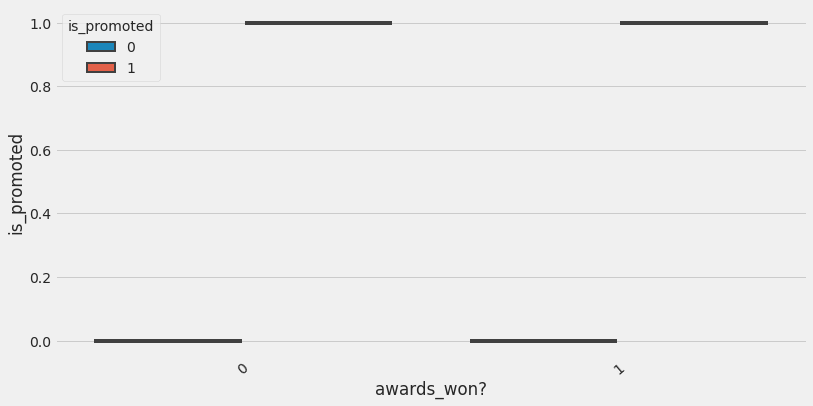

In [38]:
for i in cat_data.columns:
    for j in num_data.columns:
        sns.boxplot(df[i],df[j],hue=df['is_promoted'])
        plt.xticks(rotation=40)
        plt.show()

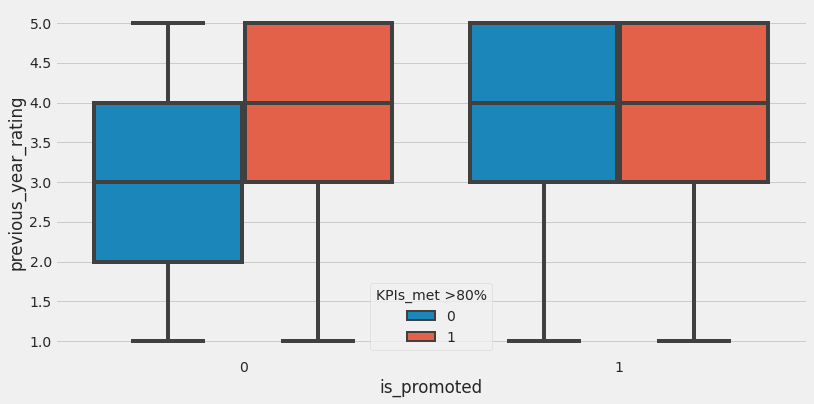

In [39]:
sns.boxplot(df['is_promoted'],df['previous_year_rating'],hue=df['KPIs_met >80%'])

The employee promoted without acheiving the KPI scored better in training score.

The employee promoted with achiving KPI scored comparetively

This indicates even if the KPI not met employee performed well in training is able to get the promotion

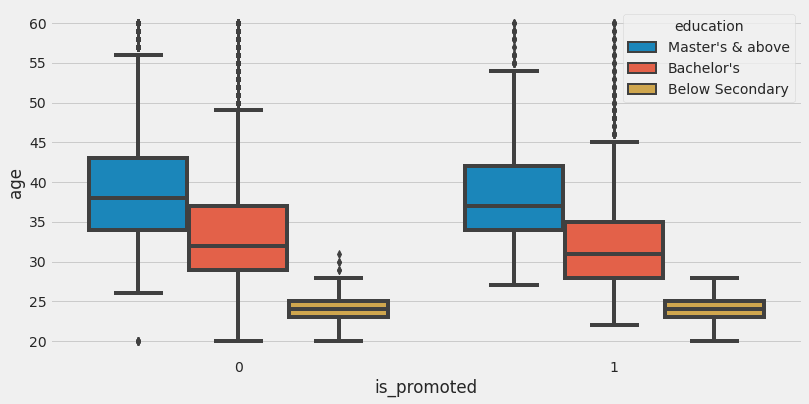

In [40]:
sns.boxplot(df['is_promoted'],df['age'],hue=df['education'])

Employees with masters and above qualification age is higher followed by backelor and below secoundary

In [41]:
pd.crosstab(df['is_promoted'],df['KPIs_met >80%'])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [42]:
# majority of promoted employees met the KPI

In [43]:
a=df[df['KPIs_met >80%']==1]
b=df[df['KPIs_met >80%']==0]

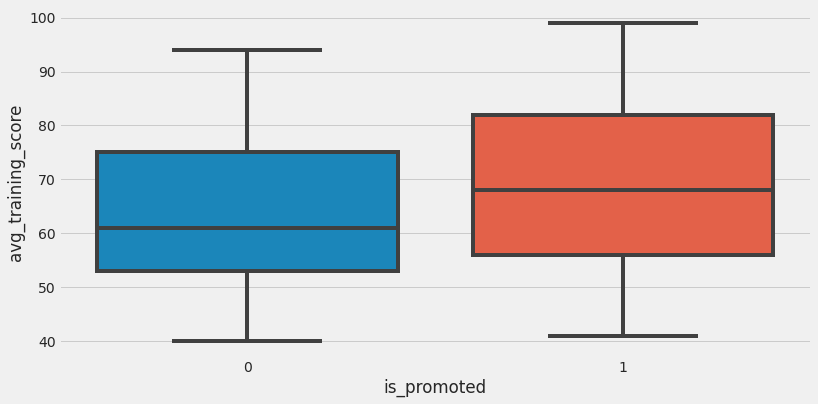

In [44]:
sns.boxplot(a['is_promoted'],a['avg_training_score'])

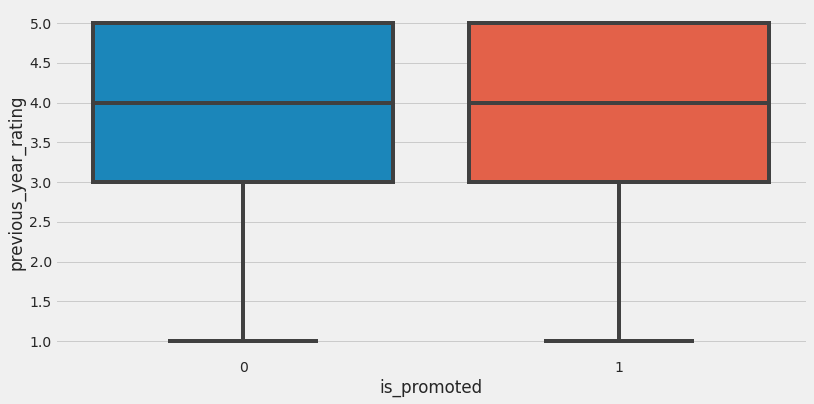

In [45]:
sns.boxplot(a['is_promoted'],a['previous_year_rating'])

The rating for promoted employees achived the KPI milestone is same as not promoted employees

However the average training_score for the promoted employees are higher for promoted.

0    4595
1       1
Name: is_promoted, dtype: int64

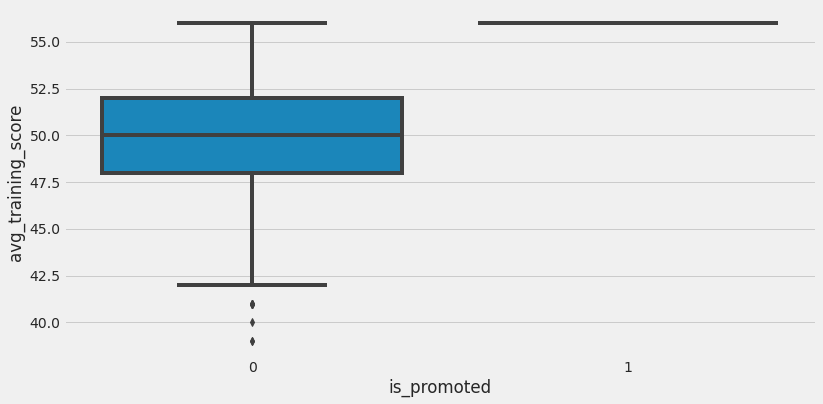

In [46]:
x=b[(b['previous_year_rating']<3)&(b['avg_training_score']<57)][['avg_training_score','is_promoted']]
sns.boxplot(x['is_promoted'],x['avg_training_score'])
x['is_promoted'].value_counts(normalize=True)
x['is_promoted'].value_counts()

kpi not achived, avg_training_score above 55 and rating <4 =1 promoted

kpi not achived, avg_training_score above 56 and rating <3 =1 promoted


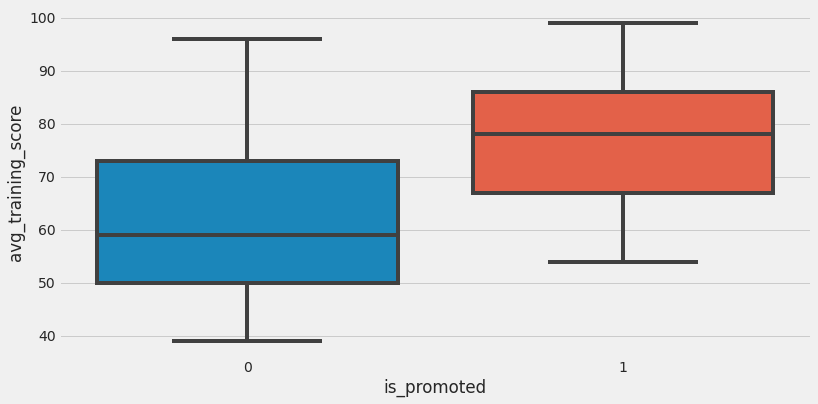

In [47]:
sns.boxplot(b['is_promoted'],b['avg_training_score'])

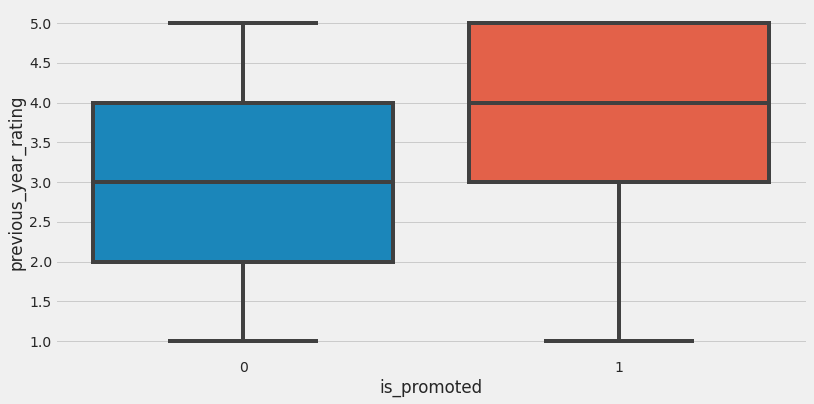

In [48]:
sns.boxplot(b['is_promoted'],b['previous_year_rating'])

The promoted employees who havent achived the KPI>80% scored better in avg_training_score

The promoted employees who havent achived the KPI>80% scored attained better previous_year_rating 

This indicates the KPI>80% and avg_training_score,previous_year_rating are more significant features in promotion


In [49]:
n=df[(df['KPIs_met >80%']==0)&(df['awards_won?']==0)&(df['previous_year_rating']<3.4)&(df['is_promoted']==1)&(df['avg_training_score']<63)]


In [50]:
n.shape[0]/df[df['is_promoted']==1].shape[0]

0.013924592973436161

Only 1.3% of employees are promoted without achiving the below conditions

'KPIs_met >80%'==0

'awards_won?'==0

'previous_year_rating'<3.4

'avg_training_score'<63

From this we can infer that above features play a major role in predicting the promotion

However we need to check other factors/features which helps the employee to get promotion even without satisfying the above condition.



In [51]:
m=df[(df['KPIs_met >80%']==0)&(df['awards_won?']==0)&(df['previous_year_rating']<3.4)&(df['is_promoted']==0)&(df['avg_training_score']<63)]
m.shape[0]/df[df['is_promoted']==0].shape[0]

0.25604307937774234

At the same time, 25% of not promoted employees are havent met the above mentioned conditions

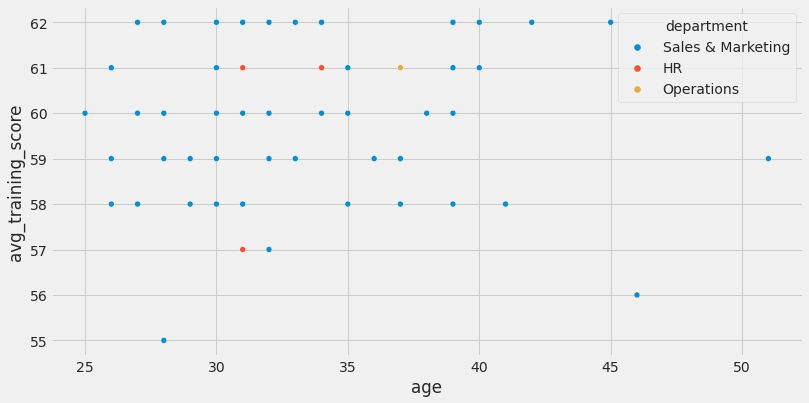

In [52]:
sns.scatterplot(n['age'],n['avg_training_score'],hue=n['department'])

In 1.3% of promoted employees,majority of employees are in sales and marketing department

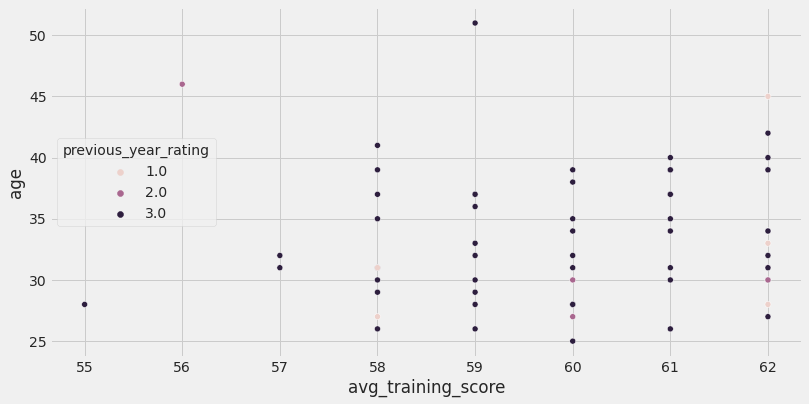

In [53]:
sns.scatterplot(n['avg_training_score'],n['age'],hue=n['previous_year_rating'])

In addition the significance of age,length_of_service are also needs to be included for better prediction

In [54]:
df['is_promoted'].nunique()

2

In [55]:
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

In [56]:
#Ttest
c=[]
pv=[]
s=[]
test=pd.DataFrame()
for i in df.columns:
  if df[i].nunique()>5 and df[i].dtype!=np.object:
    g1=df[df['is_promoted']==0][i]
    g2=df[df['is_promoted']==1][i]
    t,p=st.ttest_ind(g1,g2)
  elif df[i].nunique()==2:
    a=pd.crosstab(df[i],df['is_promoted'])
    t,p=proportions_ztest([a[0][1],a[1][1]],[a[0].sum(),a[1].sum()])
  else:
    a=pd.crosstab(df[i],df['is_promoted'])
    t,p,dof,exp=st.chi2_contingency(a)
  if p<0.05:
    s.append('Significant')
  else:
    s.append('Not Significant')
  c.append(i)
  pv.append(p)


  
test=pd.DataFrame({'Columns':c,'P-val':pv,'Significance':s})
test


,Columns,P-val,Significance
0,department,9.882497e-29,Significant
1,region,7.275378e-80,Significant
2,education,1.071652e-08,Significant
3,gender,9.301396e-03,Significant
4,recruitment_channel,6.650938e-05,Significant
5,no_of_trainings,5.570014e-09,Significant
6,age,5.846305e-05,Significant
7,previous_year_rating,0.000000e+00,Significant
8,length_of_service,1.249145e-02,Significant
9,KPIs_met >80%,0.000000e+00,Significant


All the features are Significant in predicting the target


In [57]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Data Preprocessing: 

### Missing Value Treatment:

In [58]:
(df.isnull().sum()/len(df))*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64



```
# This is formatted as code
```

#### Propotion Imputation 
education feature:

In [59]:
prop=df['education'].value_counts(normalize=True)
prop

Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: education, dtype: float64

In [60]:
nul=pd.Series(df[df['education'].isnull()].index)
l=len(nul)
for i in prop.index:
  nul=pd.Series(df[df['education'].isnull()].index)
  ind=nul.sample(round(l*prop.loc[i])).values
  df.loc[ind,'education']=i
  print(i)
  print(len(nul))
  print(l*prop.loc[i])

Bachelor's
2409
1685.8264661539345
Master's & above
723
686.1643351972366
Below Secondary
37
37.00919864882918


In [61]:
df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

previous_year_rating:

In [62]:
prop=df['previous_year_rating'].value_counts(normalize=True)
prop

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64

In [63]:
nul=pd.Series(df[df['previous_year_rating'].isnull()].index)
l=len(nul)
for i in prop.index:
  nul=pd.Series(df[df['previous_year_rating'].isnull()].index)
  ind=nul.sample(round(l*prop.loc[i])).values
  df.loc[ind,'previous_year_rating']=i
  print(i)
  print(len(nul))
  print(l*prop.loc[i])

3.0
4124
1514.8889590403282
5.0
2609
955.3287822587009
4.0
1654
803.6608791729145
1.0
850
506.3462236603267
2.0
344
343.7751558677295


# Encoding

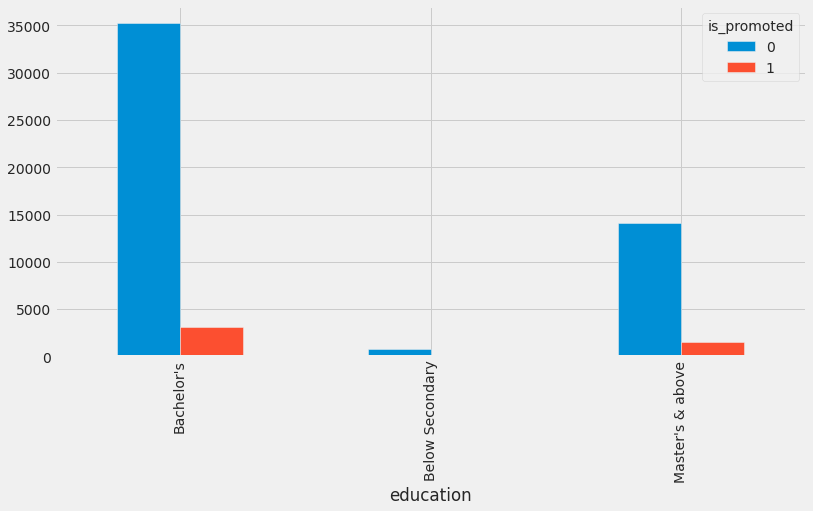

In [64]:
(pd.crosstab(df['education'],df['is_promoted'])).plot(kind='bar')

In [65]:
pd.crosstab(df['education'],df['is_promoted'],normalize='index')

is_promoted,0,1
education,,
Bachelor's,0.919254,0.080746
Below Secondary,0.919240,0.080760
Master's & above,0.903722,0.096278


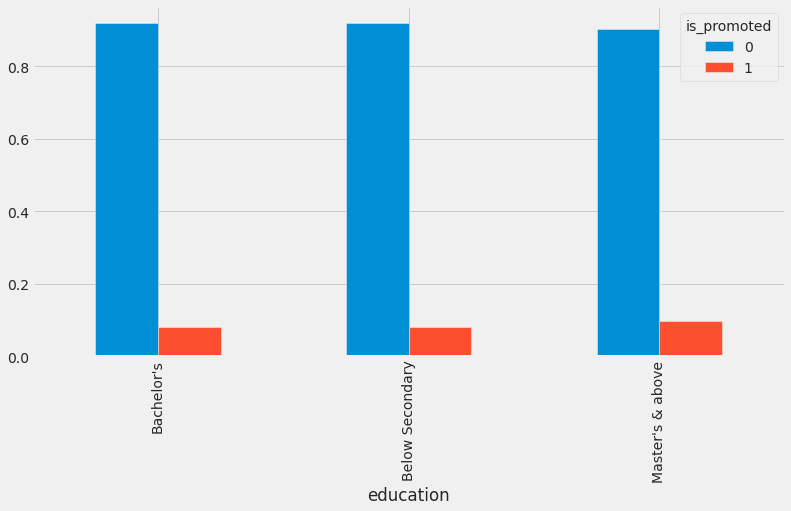

In [66]:
pd.crosstab(df['education'],df['is_promoted'],normalize='index').plot(kind='bar')

The employees with bachelors are getting least promotions followed by below secoundary and masters& above

We can perform integer encoding as below
bachelors =1
below secoundary=2
masters=3

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['education']=le.fit_transform(df['education'])

In [68]:
df['region'].nunique()


34

In [69]:
df['department'].nunique()

9

In [70]:
# frequency encoding
df['region']=df['region'].map(df['region'].value_counts())

In [71]:
#target encoding
#encoding with total number of promoted employees in each department
df['department']=df['department'].map(df.groupby(['department'])['is_promoted'].sum())

In [72]:
# Dummy/one hot encoding
#gender
df['gender']=pd.get_dummies(df['gender'],drop_first=True)

In [150]:
df['recruitment_channel']=pd.get_dummies(df['recruitment_channel'],drop_first=True)

In [153]:
df['KPIs_met >80%'].unique()

array([1, 0], dtype=object)